# **Project Title: Predicting Weather Conditions in India**
**CapStone Project for :: Organization : Entri Elevate
Name : Anjali Anish
Submission Date : 28/05/2024**
 1. **Problem Statement:**
The objective is to develop a model that accurately predicts future weather conditions in India using historical weather data.
2. **Expected Outcome**
The project aims to develop a predictive model with high accuracy in forecasting weather conditions such as temperature, humidity, and precipitation for various regions in India.
3. **Data Description**
**DataSet Source** ::Kaggle:/kaggle/input/indianweatherdataset/IndianWeatherRepository.csv

**Key Features** 
* Country of the weather data
* location_name: Name of the location (city)
* region: Administrative region of the location
* latitude: Latitude coordinate of the location
* longitude: Longitude coordinate of the location
* timezone: Timezone of the location
* last_updated_epoch: Unix timestamp of the last data update
* last_updated: Local time of the last data update
* temperature_celsius: Temperature in degrees Celsius
* temperature_fahrenheit: Temperature in degrees Fahrenheit
* condition_text: Weather condition description
* wind_mph: Wind speed in miles per hour
* wind_kph: Wind speed in kilometers per hour
* wind_degree: Wind direction in degrees
* wind_direction: Wind direction as 16-point compass
* pressure_mb: Pressure in millibars
* pressure_in: Pressure in inches
* precip_mm: Precipitation amount in millimeters
* precip_in: Precipitation amount in inches
* humidity: Humidity as a percentage
* cloud: Cloud cover as a percentage
* feels_like_celsius: Feels-like temperature in Celsius
* feels_like_fahrenheit: Feels-like temperature in Fahrenheit
* visibility_km: Visibility in kilometers
* visibility_miles: Visibility in miles
* uv_index: UV Index
* gust_mph: Wind gust in miles per hour
* gust_kph: Wind gust in kilometers per hour
* air_quality_Carbon_Monoxide: Air quality measurement: Carbon Monoxide
* air_quality_Ozone: Air quality measurement: Ozone
* air_quality_Nitrogen_dioxide: Air quality measurement: Nitrogen Dioxide
* air_quality_Sulphur_dioxide: Air quality measurement: Sulphur Dioxide
* air_quality_PM2.5: Air quality measurement: PM2.5
* air_quality_PM10: Air quality measurement: PM10
* air_quality_us-epa-index: Air quality measurement: US EPA Index
* air_quality_gb-defra-index: Air quality measurement: GB DEFRA Index
* sunrise: Local time of sunrise
* sunset: Local time of sunset
* moonrise: Local time of moonrise
* moonset: Local time of moonset
* moon_phase: Current moon phase
* moon_illumination: Moon illumination percentage
 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

# **Loading DataSet**

In [5]:
file_path = '/kaggle/input/indianweather-dataset'
weather_data = pd.read_csv('/kaggle/input/indianweather-dataset/IndianWeatherRepository.csv')
weather_data.head()


,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,29-08-2023 10:45,27.5,81.5,...,12.6,18.5,1,2,5:59 AM,6:41 PM,5:42 PM,3:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,29-08-2023 10:45,27.5,81.5,...,10.7,14.2,1,1,6:00 AM,6:40 PM,5:39 PM,3:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,29-08-2023 10:45,26.3,79.3,...,16.8,20.7,2,2,5:56 AM,6:34 PM,5:32 PM,3:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,29-08-2023 10:45,25.6,78.1,...,4.9,6.6,1,1,6:00 AM,6:38 PM,5:36 PM,3:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,29-08-2023 10:45,27.2,81.0,...,11.4,14.8,1,1,6:01 AM,6:39 PM,5:38 PM,3:42 AM,Waxing Gibbous,93


# **Data Preprocessing**

In [5]:
# Calculate and print the count of missing values for each column
missing_values = weather_data.isnull().sum()
print(missing_values)

# Impute missing values for numeric columns with the mean
numeric_columns = weather_data.select_dtypes(include=['number']).columns
weather_data[numeric_columns] = weather_data[numeric_columns].fillna(weather_data[numeric_columns].mean())

# Impute missing values for non-numeric columns with the mode
non_numeric_columns = weather_data.select_dtypes(exclude=['number']).columns
for column in non_numeric_columns:
    weather_data[column].fillna(weather_data[column].mode()[0], inplace=True)

# Verify that there are no more missing values
print(weather_data.isnull().sum())


country                         0
location_name                   0
region                          0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Oz

****Dealing with Duplicate Data****

In [6]:
# Checking for duplicate records
duplicates = weather_data.duplicated().sum()
print(f'Duplicates: {duplicates}')

# Removing duplicate records
weather_data = weather_data.drop_duplicates()


Duplicates: 29


# **Outlier Detection and Treatment**

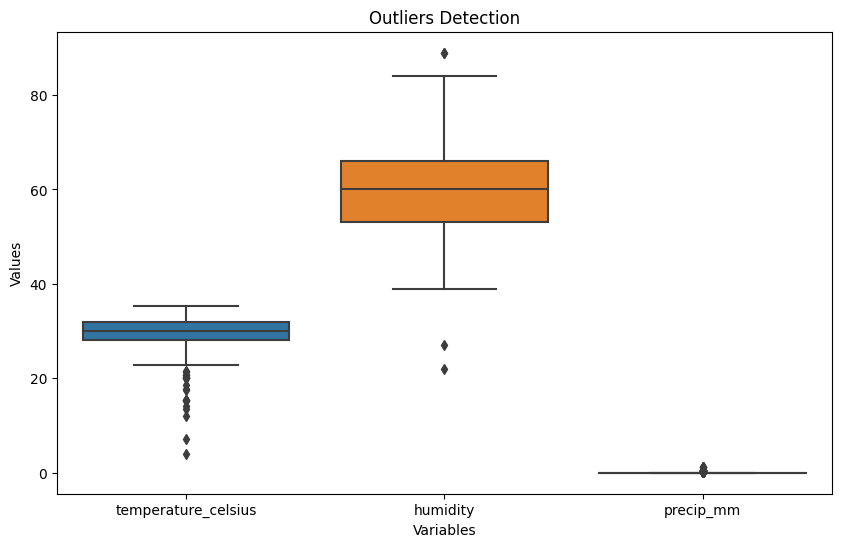

Number of rows before removing outliers: 543
Number of rows after removing outliers: 242


In [7]:
# Identifying outliers using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=weather_data[['temperature_celsius', 'humidity', 'precip_mm']])
plt.title("Outliers Detection")
plt.xlabel("Variables")
plt.ylabel("Values")
plt.show()

# Select numeric columns for outlier detection
numeric_data = weather_data.select_dtypes(include=['number'])

# Calculate Q1 and Q3
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside 1.5*IQR range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
weather_data_no_outliers = weather_data[~((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)]

# Print the number of outliers removed
print(f'Number of rows before removing outliers: {len(weather_data)}')
print(f'Number of rows after removing outliers: {len(weather_data_no_outliers)}')



**Feature Scaling/Normalization**

In [8]:
# Display original data
print("Original Weather Data:")
print(weather_data)

# Scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(weather_data[['temperature_celsius', 'humidity', 'precip_mm']])

# Create a DataFrame for scaled features
scaled_features_df = pd.DataFrame(scaled_features, columns=['temperature_celsius', 'humidity', 'precip_mm'])

# Display scaled features
print("\nScaled Features:")
print(scaled_features_df)

Original Weather Data:
    country location_name          region  latitude  longitude      timezone  \
0     India    Ashoknagar  Madhya Pradesh     24.57      77.72  Asia/Kolkata   
1     India        Raisen  Madhya Pradesh     23.33      77.80  Asia/Kolkata   
2     India    Chhindwara  Madhya Pradesh     22.07      78.93  Asia/Kolkata   
3     India         Betul  Madhya Pradesh     21.86      77.93  Asia/Kolkata   
4     India   Hoshangabad  Madhya Pradesh     22.75      77.72  Asia/Kolkata   
..      ...           ...             ...       ...        ...           ...   
566   India        Niwari   Uttar Pradesh     28.88      77.53  Asia/Kolkata   
568   India       Saitual         Mizoram     23.97      92.58  Asia/Kolkata   
569   India       Ranipet      Tamil Nadu     12.93      79.33  Asia/Kolkata   
570   India       Tenkasi      Tamil Nadu      8.97      77.30  Asia/Kolkata   
571   India        Pendra     Maharashtra     21.93      74.15  Asia/Kolkata   

     last_update

**Descriptive statistics**

In [10]:
# Descriptive statistics
desc_stats = weather_data.describe()

# Print the descriptive statistics with a suitable output statement
print("Descriptive Statistics of Weather Data:")
print(desc_stats)


Descriptive Statistics of Weather Data:
         latitude   longitude  last_updated_epoch  temperature_celsius  \
count  543.000000  543.000000        5.430000e+02           543.000000   
mean    23.110829   80.211584        1.693286e+09            29.666667   
std      5.815159    5.763751        0.000000e+00             3.617747   
min      8.080000   68.970000        1.693286e+09             4.000000   
25%     20.270000   76.070000        1.693286e+09            28.100000   
50%     23.980000   78.620000        1.693286e+09            30.100000   
75%     26.775000   83.845000        1.693286e+09            32.000000   
max     34.570000   95.800000        1.693286e+09            35.300000   

       temperature_fahrenheit    wind_mph    wind_kph  wind_degree  \
count              543.000000  543.000000  543.000000   543.000000   
mean                85.400921    7.848066   12.627624   260.607735   
std                  6.512924    3.731979    6.003579    72.365991   
min          

# Exploratory Data Analysis (EDA)

> **AIR**

**Distribution of Air Quality Indicators**

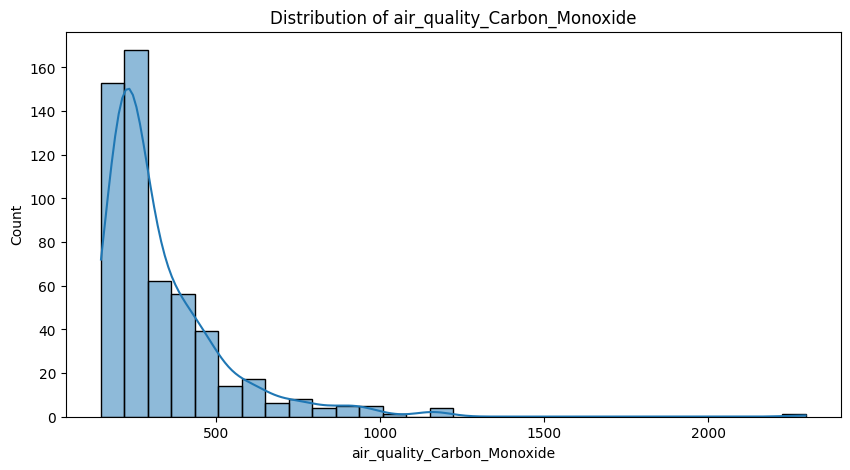

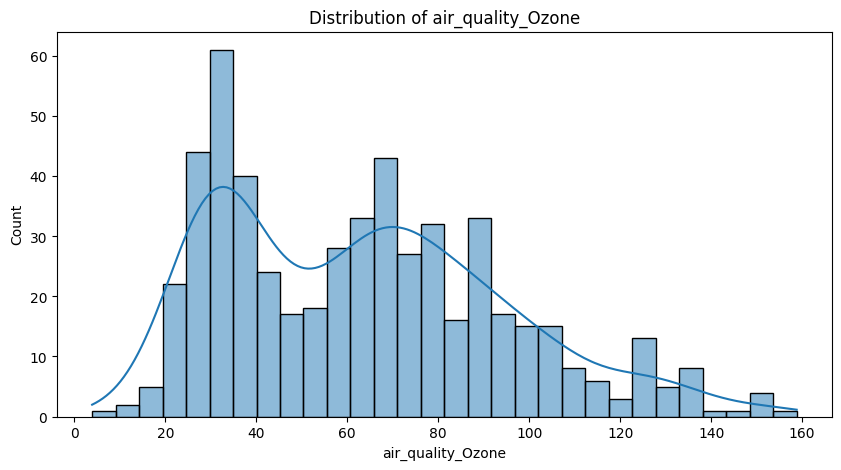

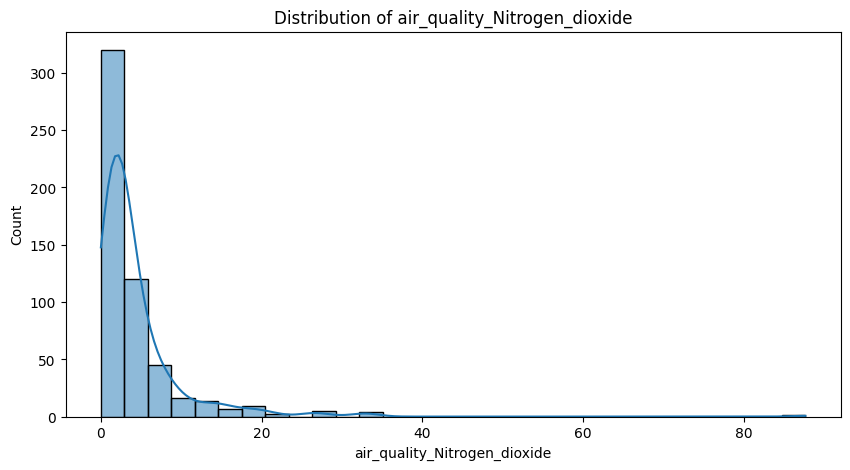

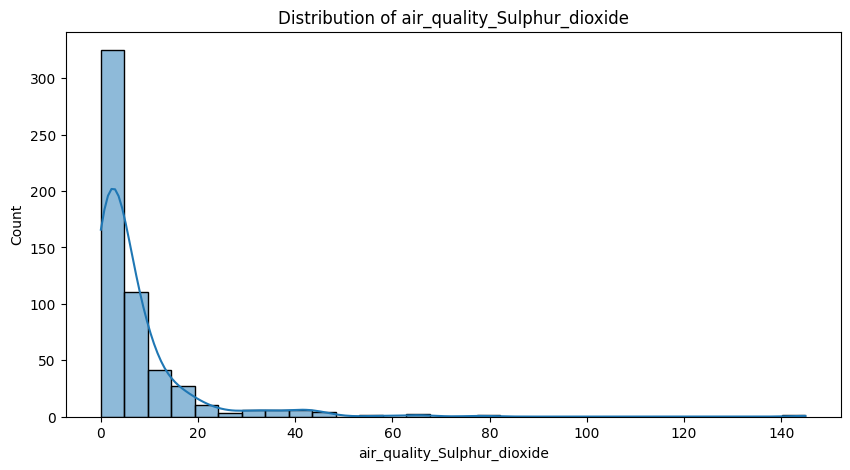

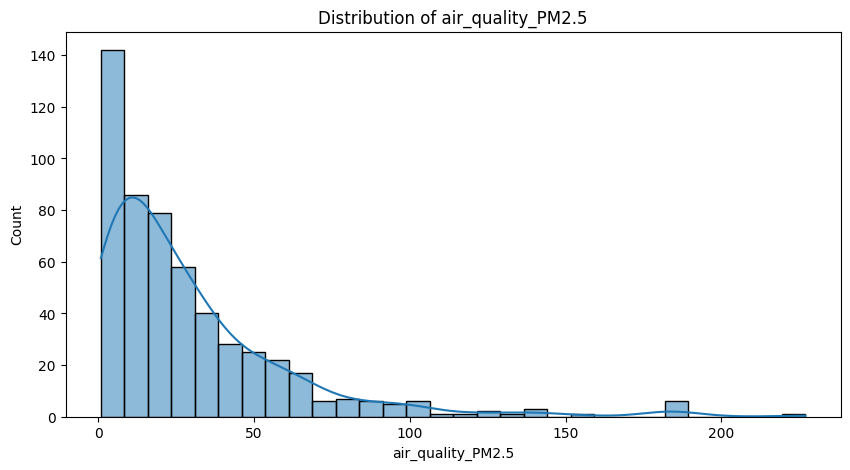

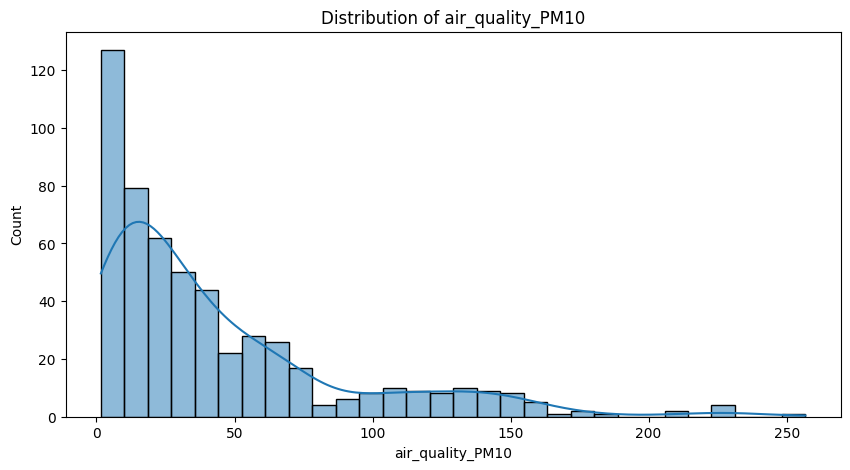

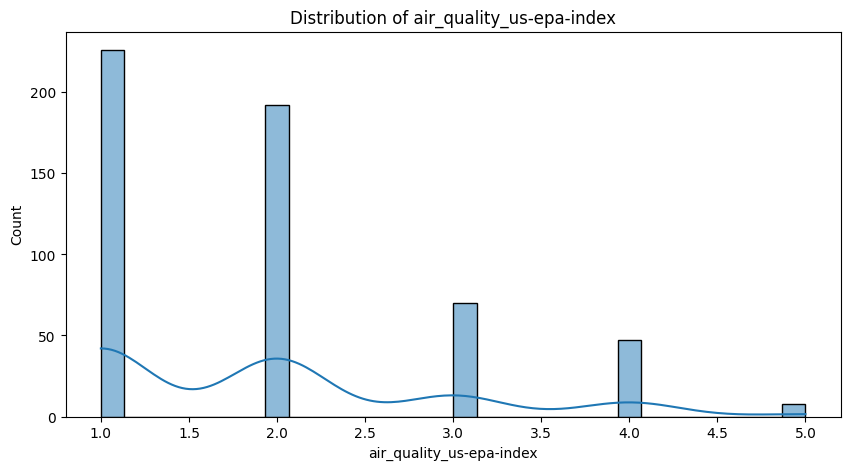

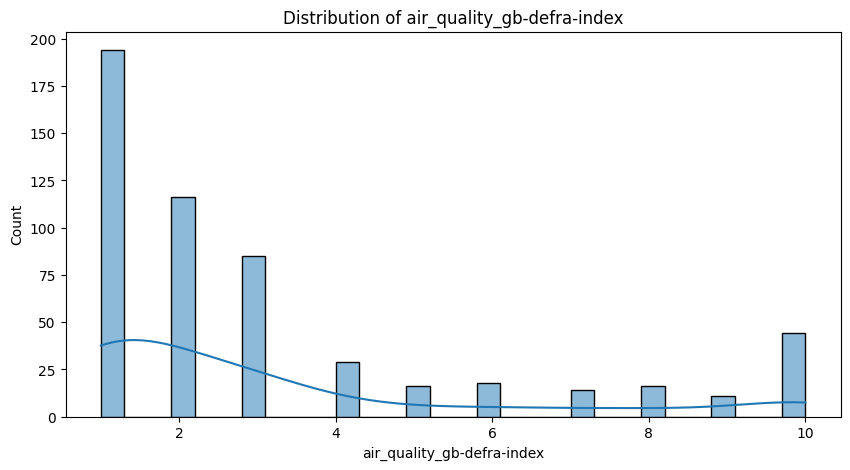

In [11]:
# List of air quality columns
air_quality_columns = [
    'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 
    'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
    'air_quality_PM2.5', 'air_quality_PM10', 
    'air_quality_us-epa-index', 'air_quality_gb-defra-index'
]

# Plot histograms for each air quality indicator
for column in air_quality_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(weather_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

**Correlation Between Air Quality Indicators**

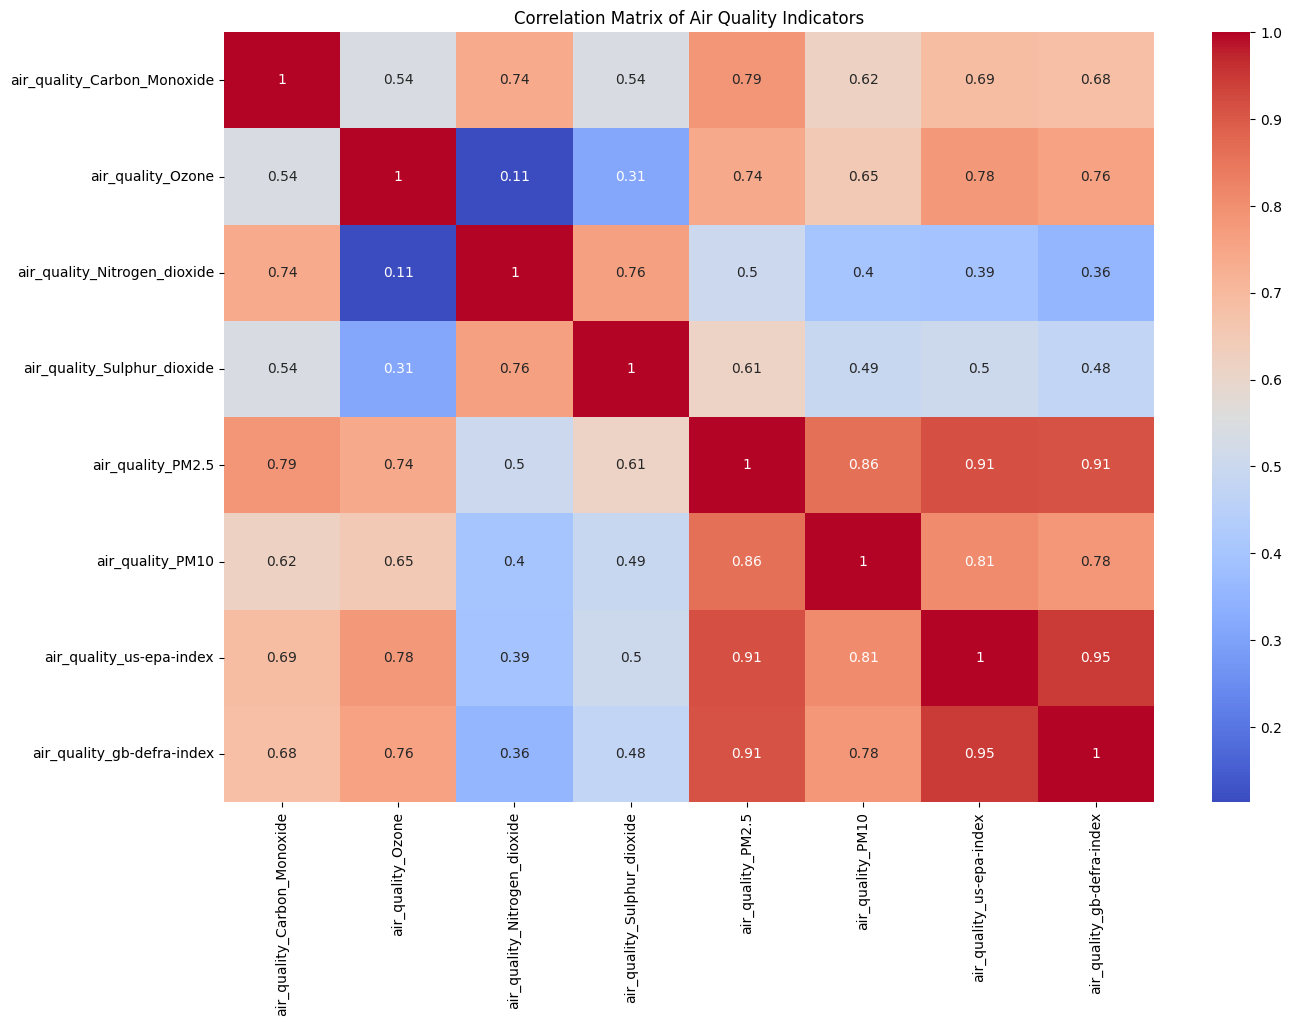

In [12]:
# Correlation matrix
plt.figure(figsize=(15, 10))
corr_matrix = weather_data[air_quality_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Air Quality Indicators')
plt.show()


**Pair Plot: To visualize pairwise relationships between air quality indicators.**

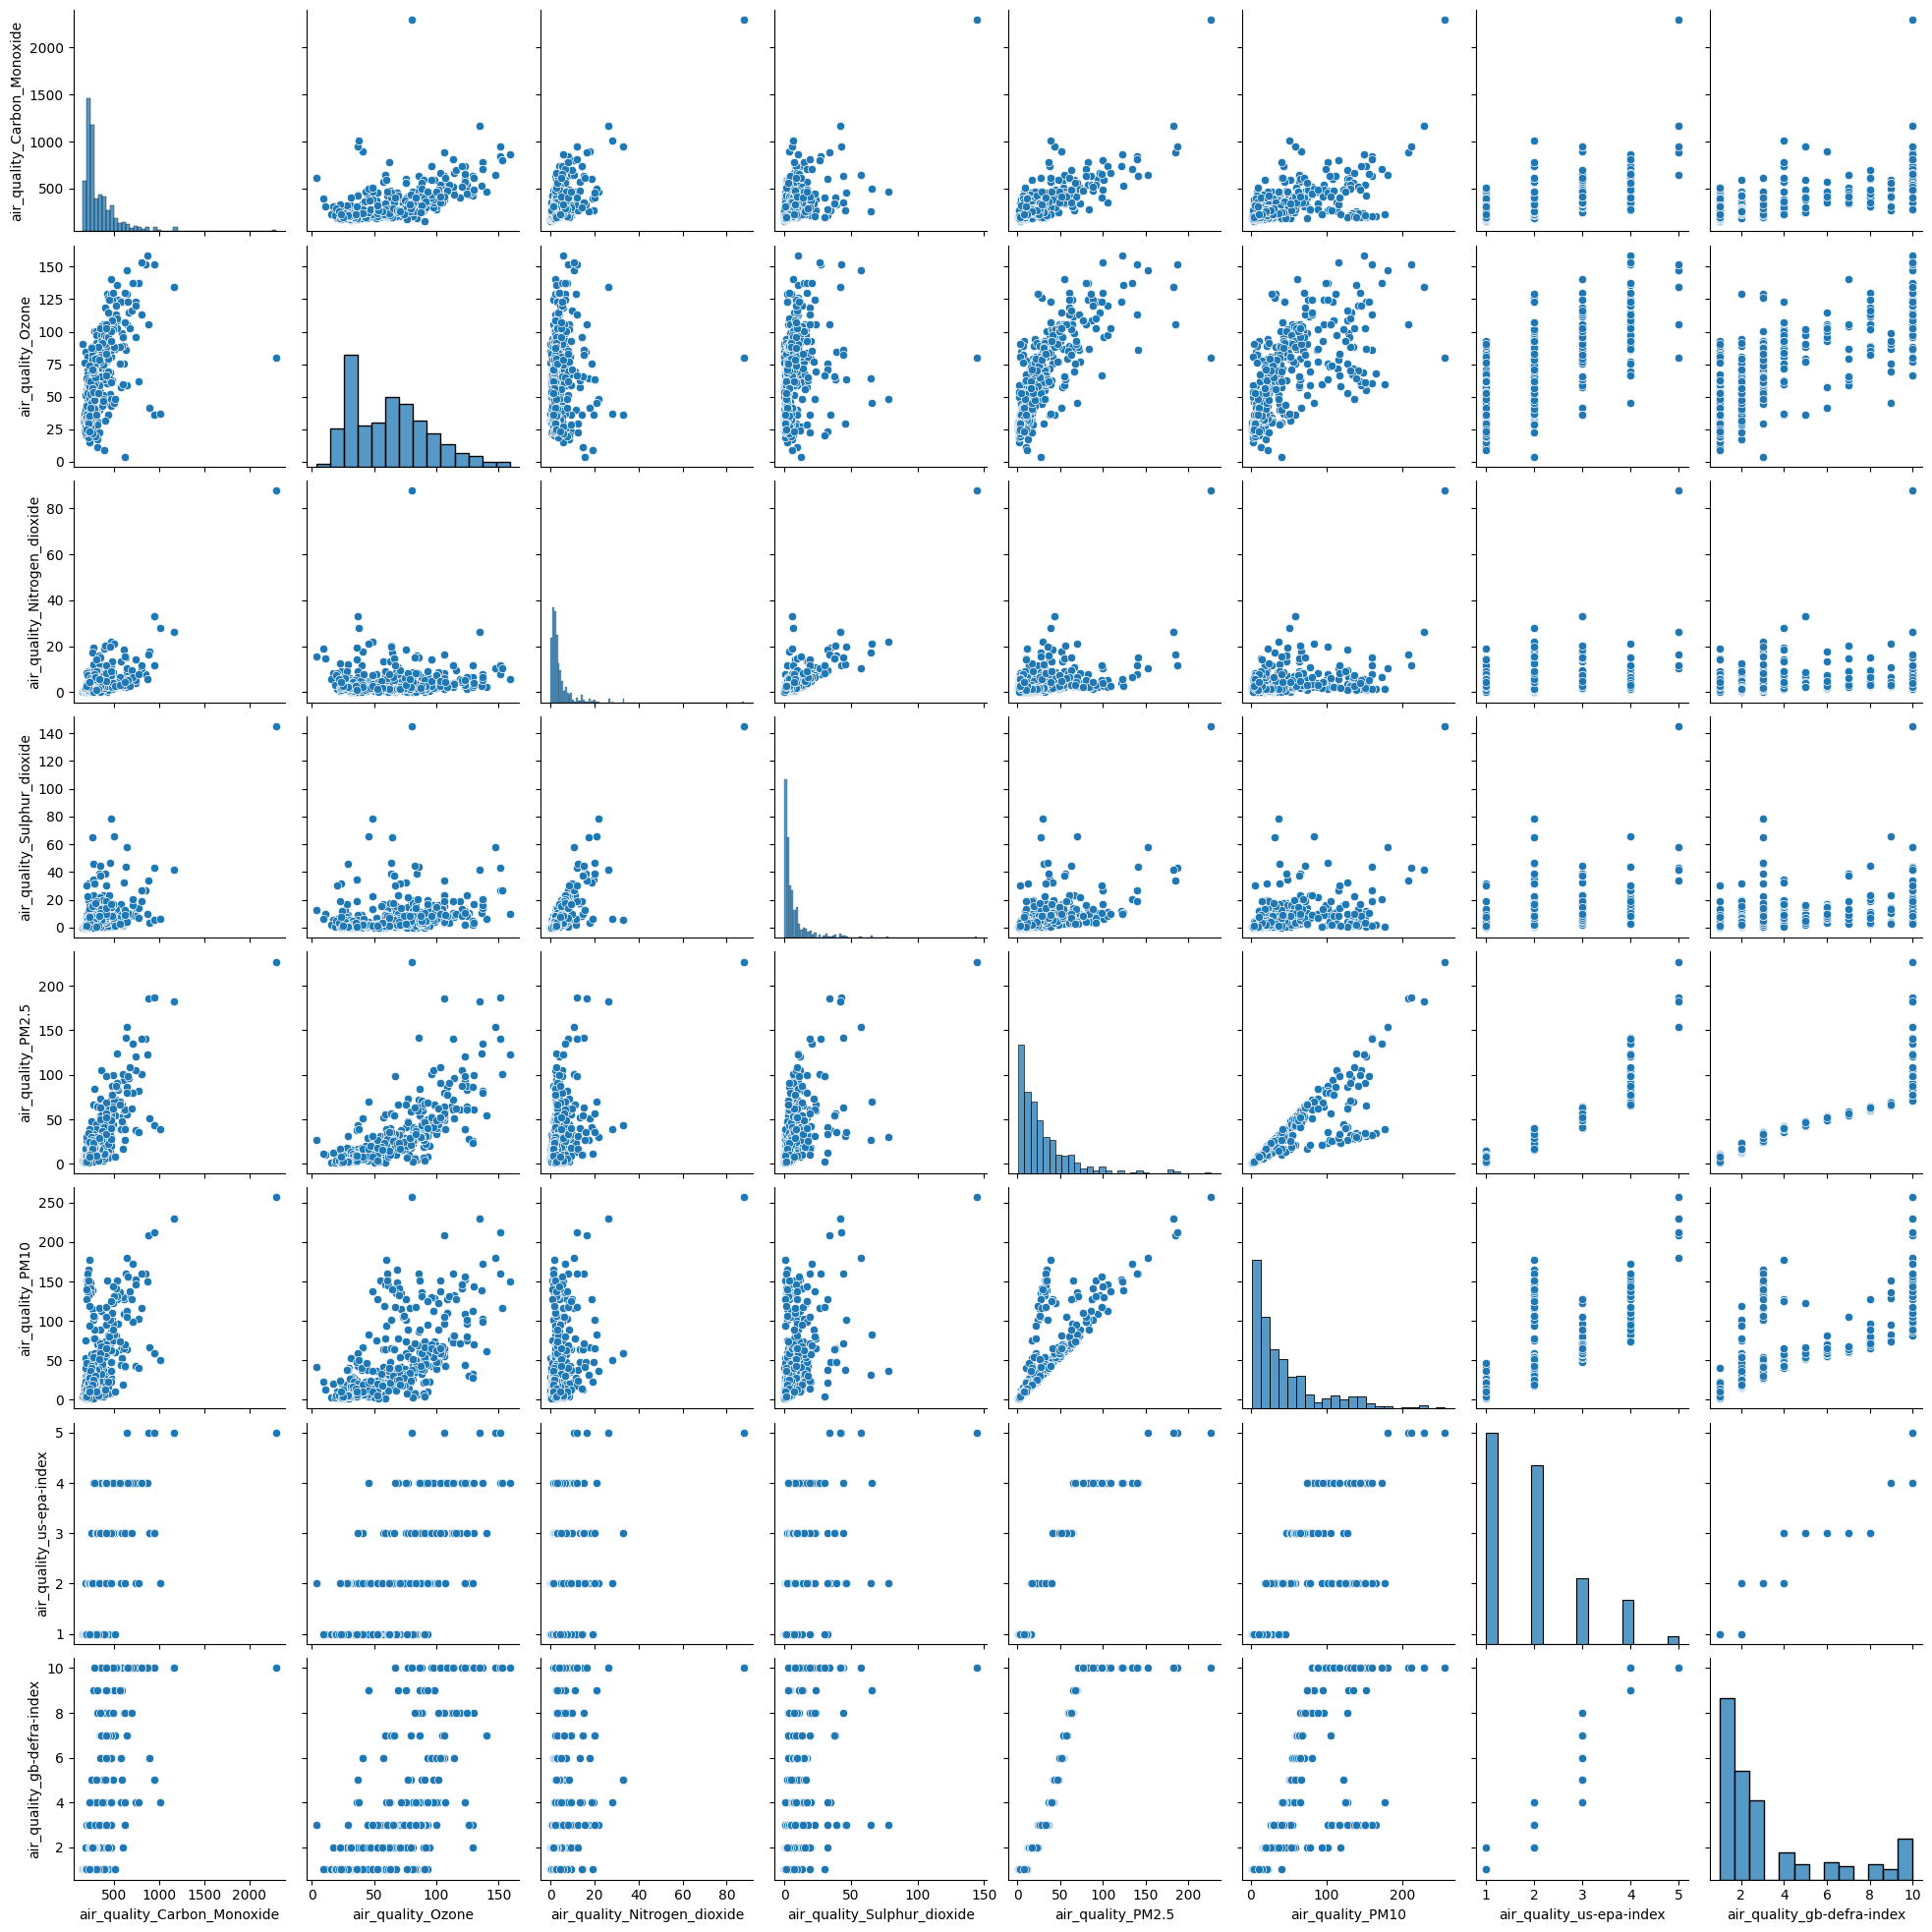

In [13]:
# Pair plot for air quality indicators
sns.pairplot(weather_data[air_quality_columns])
plt.show()


**Interaction of Air Quality with Other Factors.**

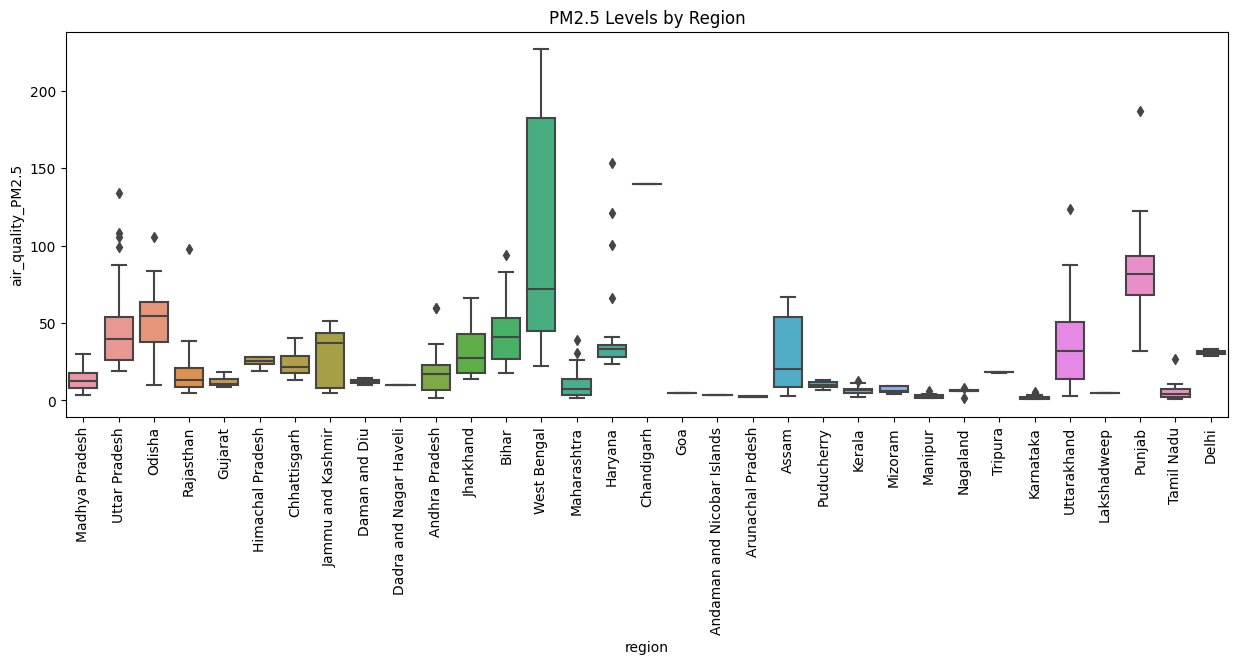

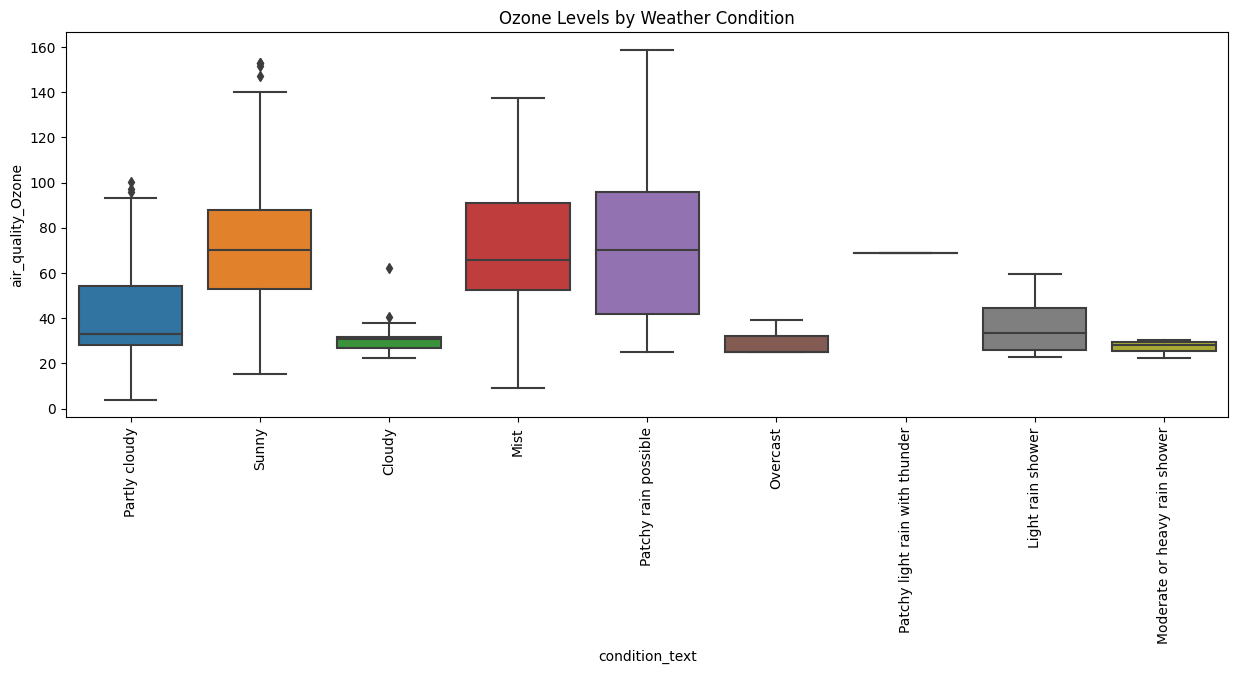

In [14]:
# Box plot for air quality indicators across different regions
plt.figure(figsize=(15, 5))
sns.boxplot(x='region', y='air_quality_PM2.5', data=weather_data)
plt.title('PM2.5 Levels by Region')
plt.xticks(rotation=90)
plt.show()

# Box plot for air quality indicators across different weather conditions
plt.figure(figsize=(15, 5))
sns.boxplot(x='condition_text', y='air_quality_Ozone', data=weather_data)
plt.title('Ozone Levels by Weather Condition')
plt.xticks(rotation=90)
plt.show()


**Time Series Analysis**

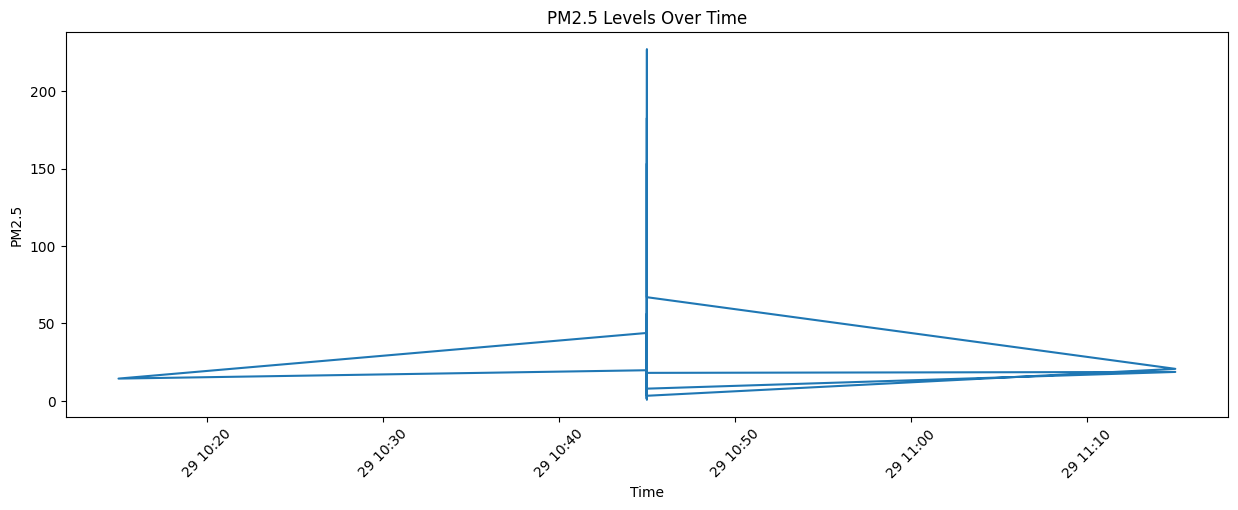

In [15]:
# Convert to datetime
weather_data['last_updated'] = pd.to_datetime(weather_data['last_updated'])

# Time series plot for PM2.5
plt.figure(figsize=(15, 5))
plt.plot(weather_data['last_updated'], weather_data['air_quality_PM2.5'])
plt.title('PM2.5 Levels Over Time')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.show()


**Geographical Distribution of Air Quality**

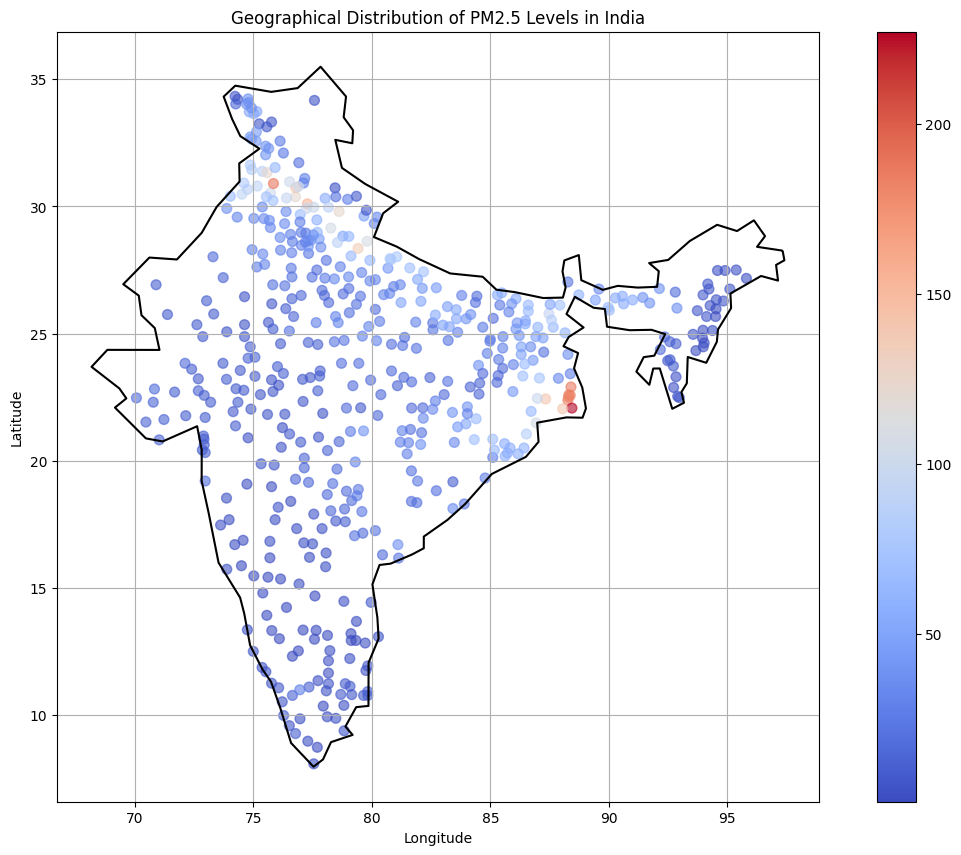

In [18]:
# Ensure that the latitude and longitude columns are in the correct data type
weather_data['latitude'] = weather_data['latitude'].astype(float)
weather_data['longitude'] = weather_data['longitude'].astype(float)

# Load the world map and filter for India
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
india = world[world.name == 'India']

# Ensure the GeoDataFrame uses the same CRS as the world map
gdf = gpd.GeoDataFrame(weather_data, 
                       geometry=gpd.points_from_xy(weather_data.longitude, weather_data.latitude),
                       crs=world.crs)

# Filter the GeoDataFrame for points within India
india_geom = india.geometry.squeeze()
gdf = gdf[gdf.geometry.within(india_geom)]

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
india.boundary.plot(ax=ax, color='black')
gdf.plot(column='air_quality_PM2.5', ax=ax, legend=True, markersize=50, cmap='coolwarm', alpha=0.6)
plt.title('Geographical Distribution of PM2.5 Levels in India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

**Geospatial Analysis: Geographical Distribution of Air Quality**

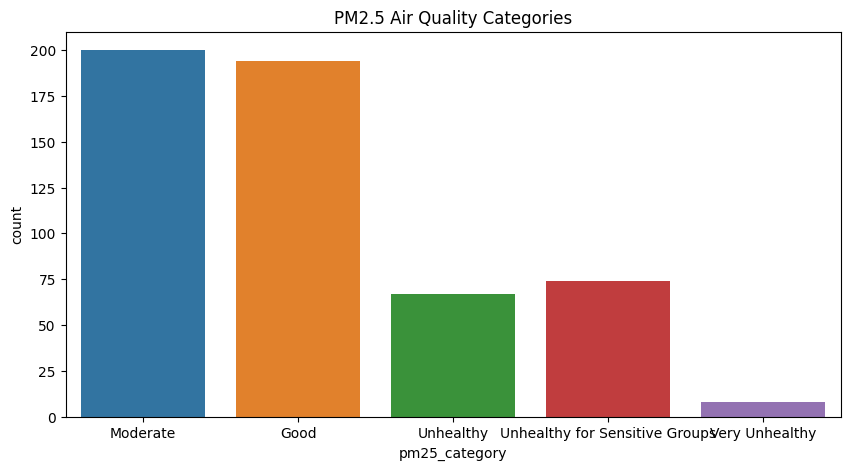

In [20]:
# Categorize PM2.5 levels
def categorize_pm25(value):
    if value <= 12:
        return 'Good'
    elif value <= 35.4:
        return 'Moderate'
    elif value <= 55.4:
        return 'Unhealthy for Sensitive Groups'
    elif value <= 150.4:
        return 'Unhealthy'
    elif value <= 250.4:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

weather_data['pm25_category'] = weather_data['air_quality_PM2.5'].apply(categorize_pm25)

# Countplot for PM2.5 categories
plt.figure(figsize=(10, 5))
sns.countplot(x='pm25_category', data=weather_data)
plt.title('PM2.5 Air Quality Categories')
plt.show()


# **Sun & Moon**

**Categorical Columns**
Histograms: For columns like latitude, longitude, moon_illumination.

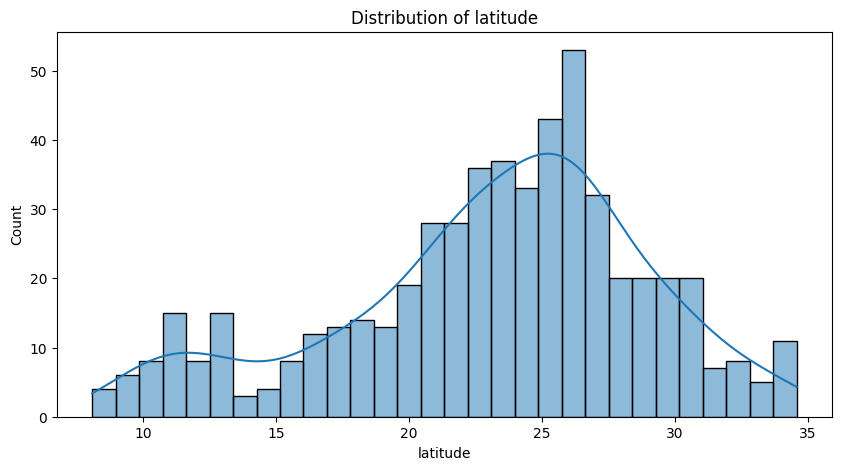

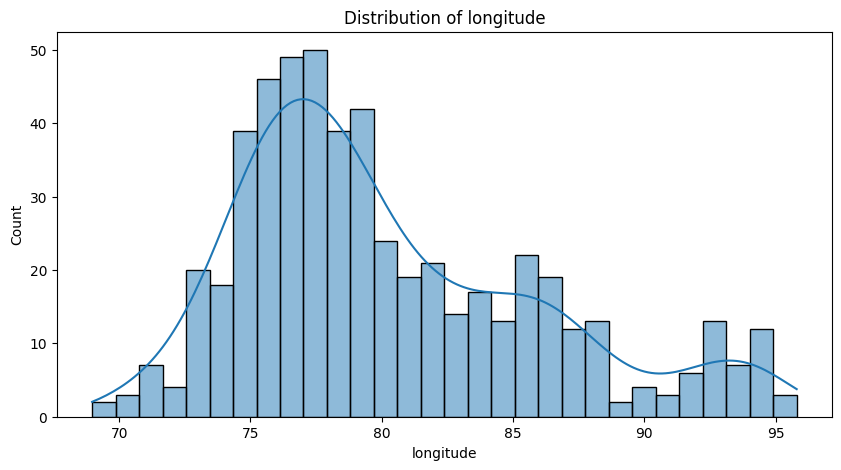

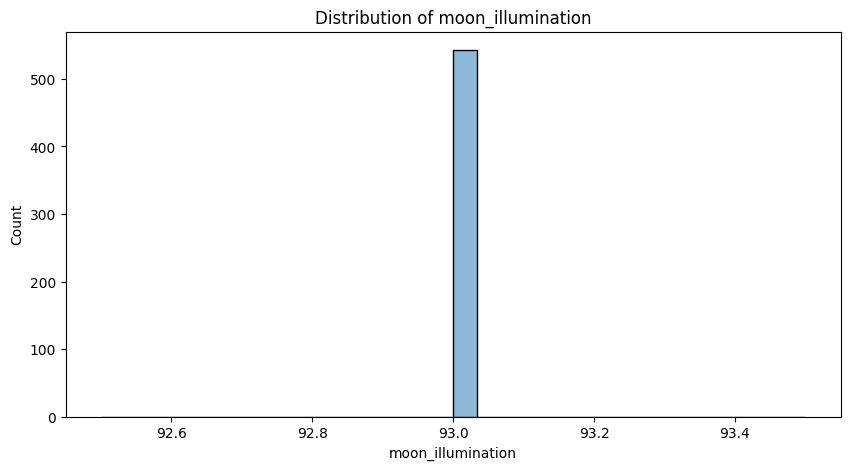

In [21]:
# Histogram for numerical columns
numerical_columns = ['latitude', 'longitude', 'moon_illumination']

for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(weather_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()


**Numerical vs. Categorical**
Box Plots: For comparing distributions of numerical features across different categories.

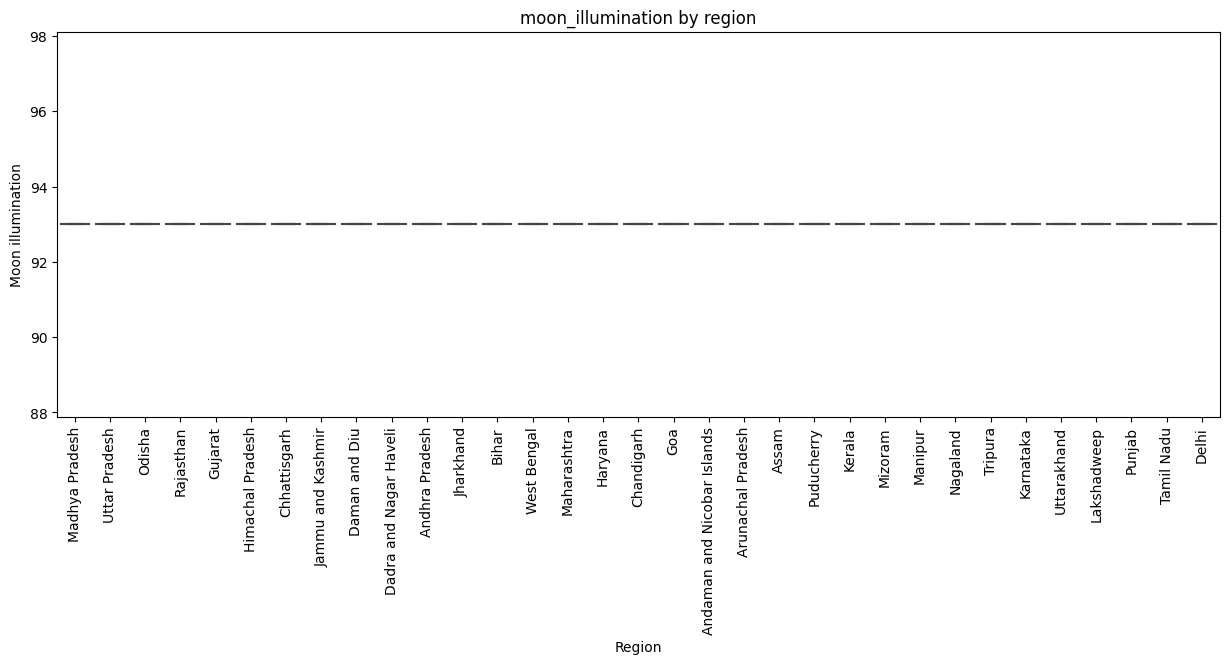

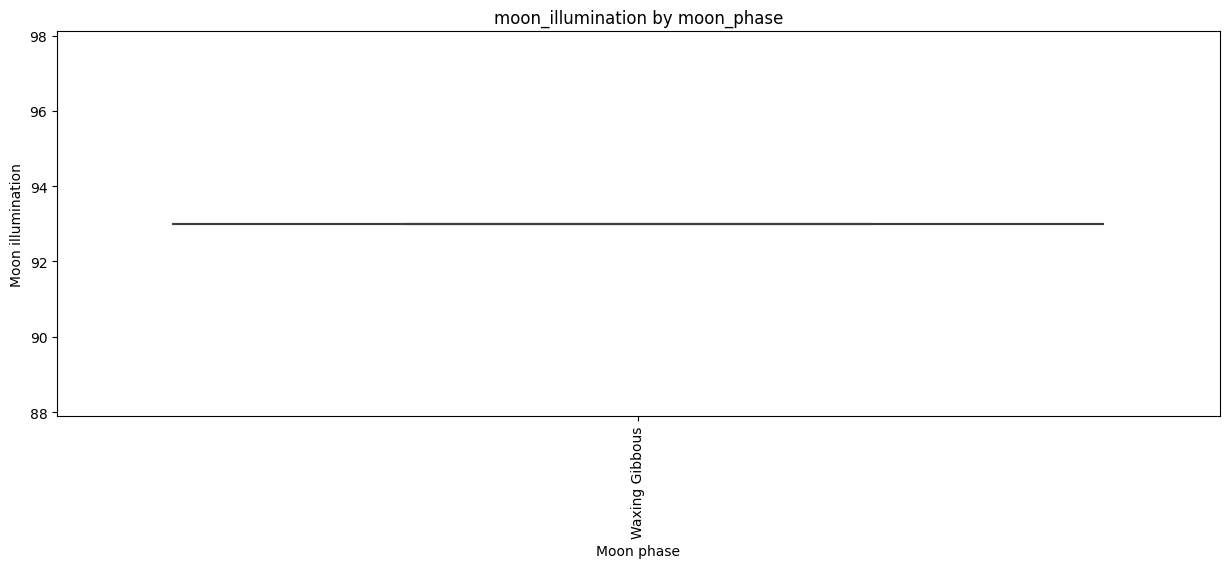

In [23]:
# Box plot for numerical vs categorical columns
cat_num_pairs = [('region', 'moon_illumination'), ('moon_phase', 'moon_illumination')]
for cat, num in cat_num_pairs:
    plt.figure(figsize=(15, 5))
    sns.boxplot(x=cat, y=num, data=weather_data)
    plt.title(f'{num} by {cat}')
    plt.xticks(rotation=90)
    plt.xlabel(cat.replace('_', ' ').capitalize())
    plt.ylabel(num.replace('_', ' ').capitalize())
    plt.show()

**Numerical vs. Numerical**
Scatter Plots: For relationships between latitude and longitude.

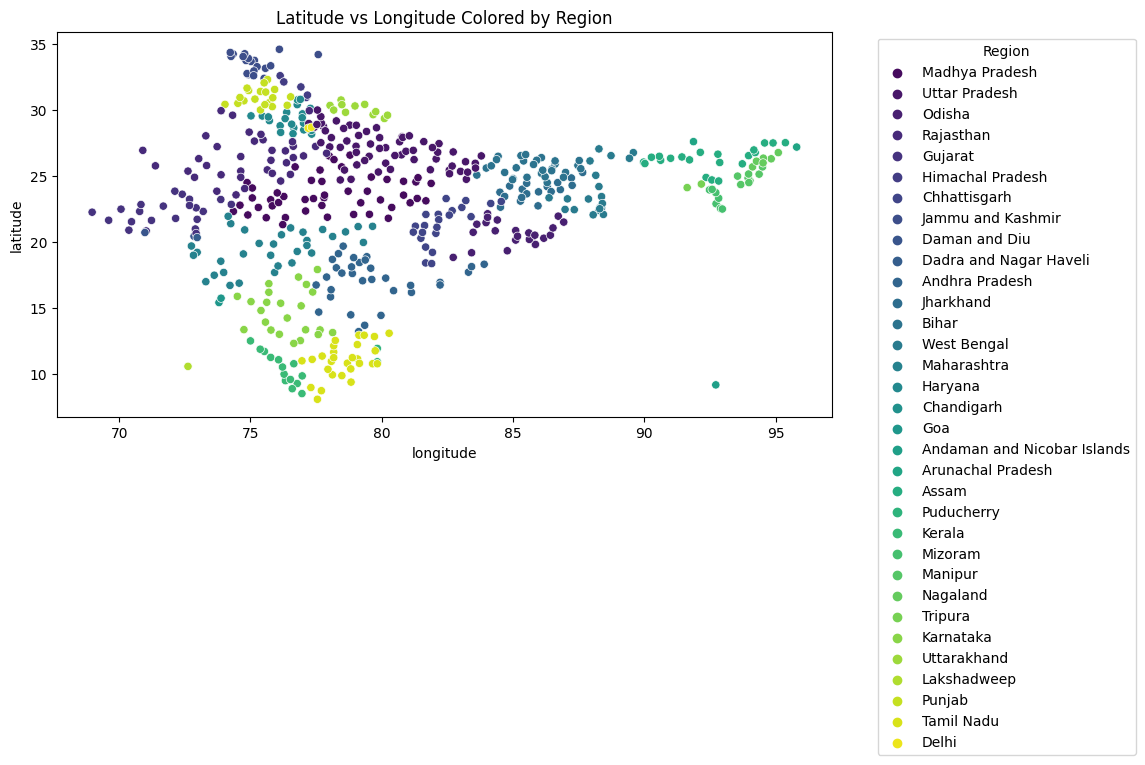

In [24]:
# Scatter plot for latitude vs longitude with different colors for regions
plt.figure(figsize=(10, 5))
sns.scatterplot(x='longitude', y='latitude', hue='region', palette='viridis', data=weather_data)
plt.title('Latitude vs Longitude Colored by Region')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Time Series Analysis**

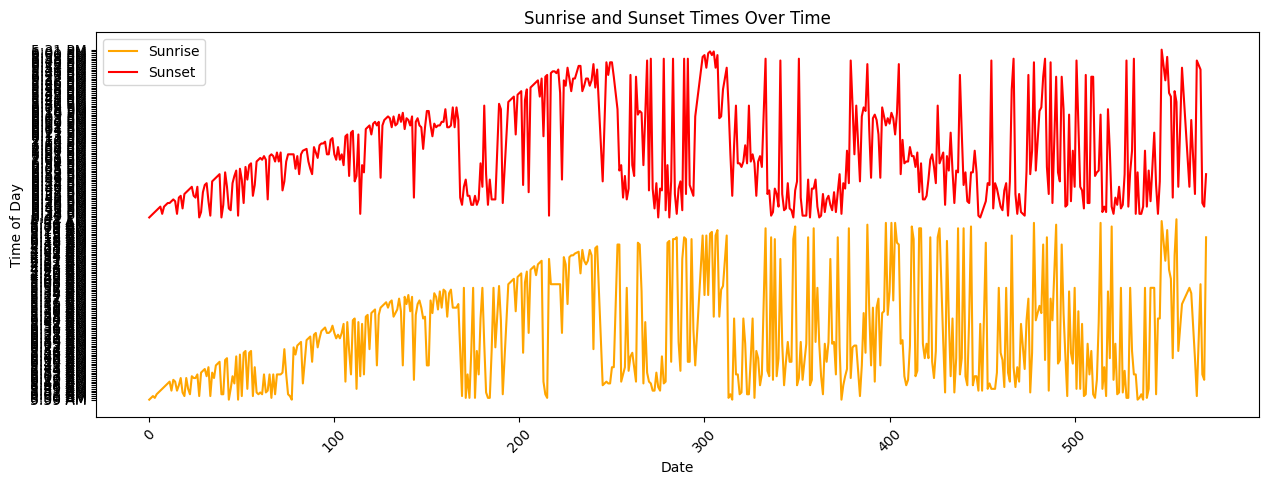

In [25]:
# Time series plot for sunrise and sunset
plt.figure(figsize=(15, 5))
plt.plot(weather_data['sunrise'], label='Sunrise', color='orange')
plt.plot(weather_data['sunset'], label='Sunset', color='red')
plt.title('Sunrise and Sunset Times Over Time')
plt.xlabel('Date')
plt.ylabel('Time of Day')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Sun & Moon's: Feature Engineering**

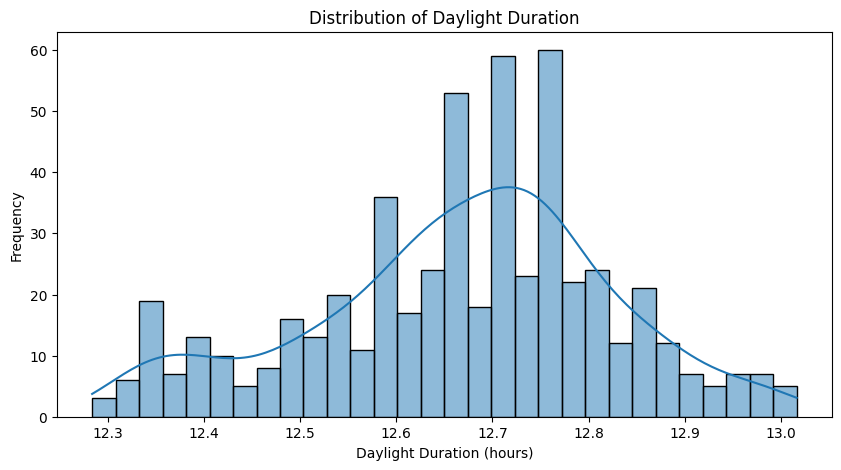

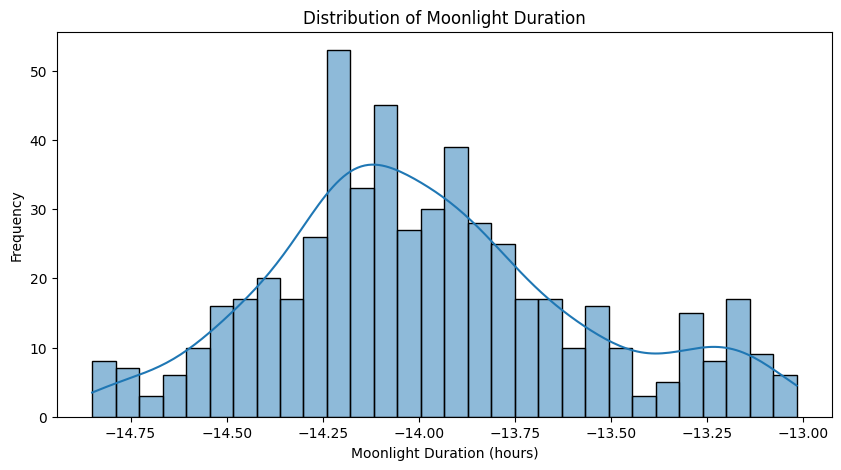

In [27]:
# Convert time columns to datetime
time_columns = ['sunrise', 'sunset', 'moonrise', 'moonset']
for col in time_columns:
    weather_data[col] = pd.to_datetime(weather_data[col])

# Duration of daylight
weather_data['daylight_duration'] = (weather_data['sunset'] - weather_data['sunrise']).dt.total_seconds() / 3600  # in hours

# Duration of moonlight
weather_data['moonlight_duration'] = (weather_data['moonset'] - weather_data['moonrise']).dt.total_seconds() / 3600  # in hours

# Distribution of daylight and moonlight duration
plt.figure(figsize=(10, 5))
sns.histplot(weather_data['daylight_duration'], kde=True, bins=30)
plt.title('Distribution of Daylight Duration')
plt.xlabel('Daylight Duration (hours)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(weather_data['moonlight_duration'], kde=True, bins=30)
plt.title('Distribution of Moonlight Duration')
plt.xlabel('Moonlight Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# **Wind**

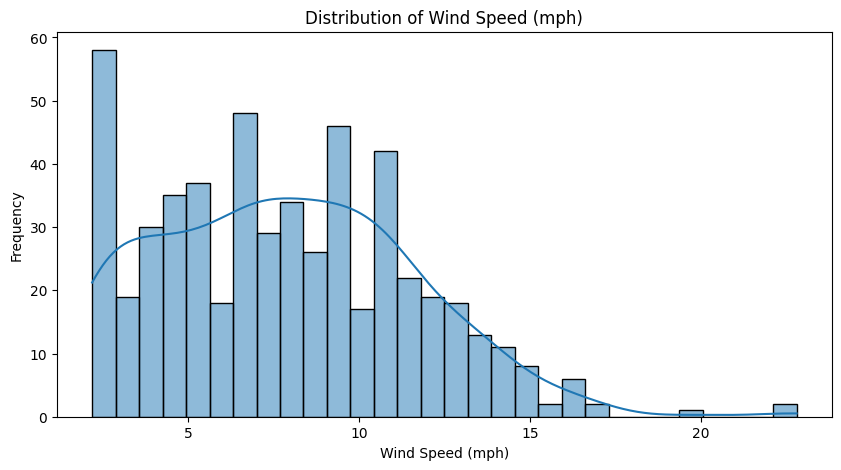

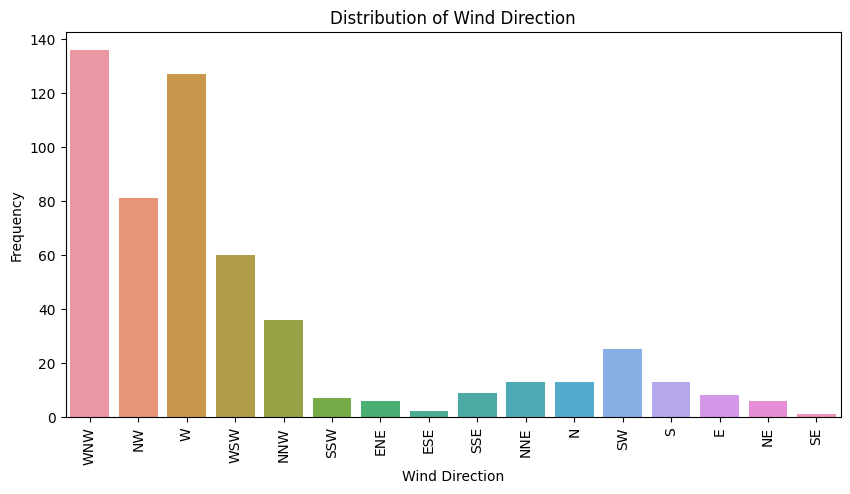

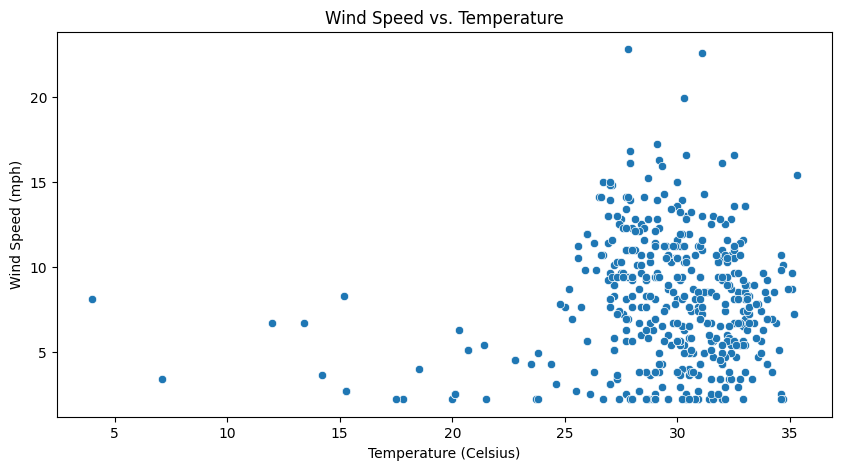

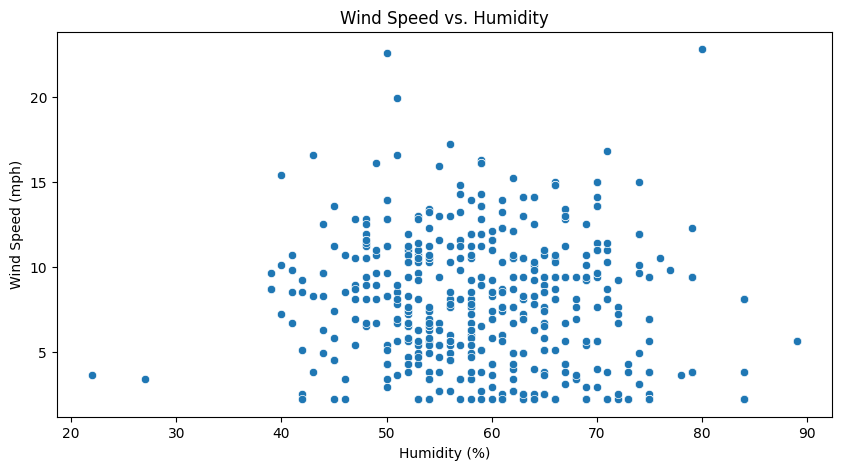

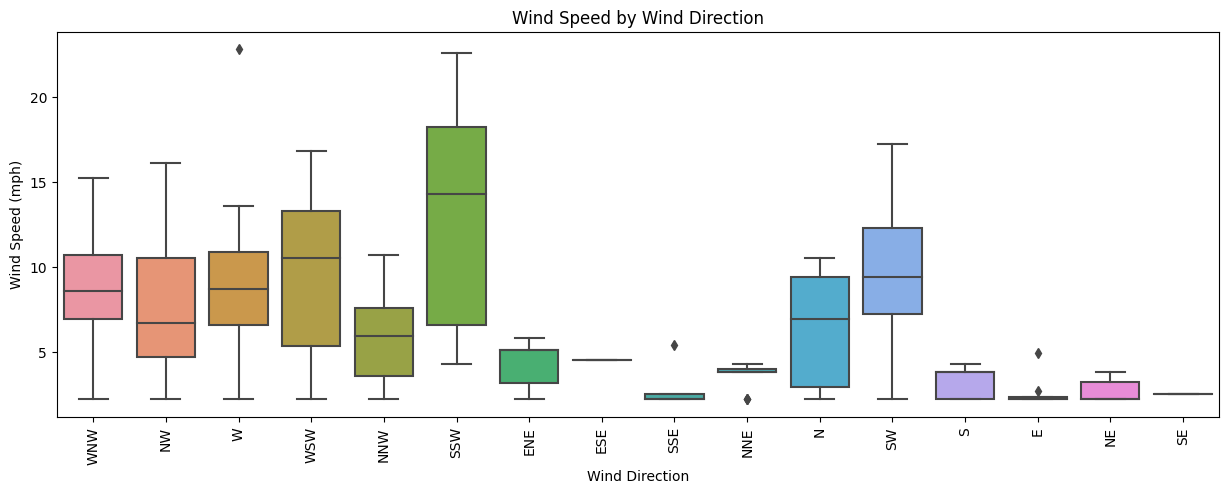

In [37]:
# Convert relevant columns to appropriate data types if necessary
weather_data['wind_mph'] = weather_data['wind_mph'].astype(float)
weather_data['temperature_celsius'] = weather_data['temperature_celsius'].astype(float)
weather_data['humidity'] = weather_data['humidity'].astype(float)

# Univariate Analysis
plt.figure(figsize=(10, 5))
sns.histplot(weather_data['wind_mph'], kde=True, bins=30)
plt.title('Distribution of Wind Speed (mph)')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='wind_direction', data=weather_data)
plt.title('Distribution of Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis
plt.figure(figsize=(10, 5))
sns.scatterplot(x='temperature_celsius', y='wind_mph', data=weather_data)
plt.title('Wind Speed vs. Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Wind Speed (mph)')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='humidity', y='wind_mph', data=weather_data)
plt.title('Wind Speed vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Wind Speed (mph)')
plt.show()

# Wind Speed by Wind Direction
plt.figure(figsize=(15, 5))
sns.boxplot(x='wind_direction', y='wind_mph', data=weather_data)
plt.title('Wind Speed by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Wind Speed (mph)')
plt.xticks(rotation=90)
plt.show()

**Comparitive Graphs**

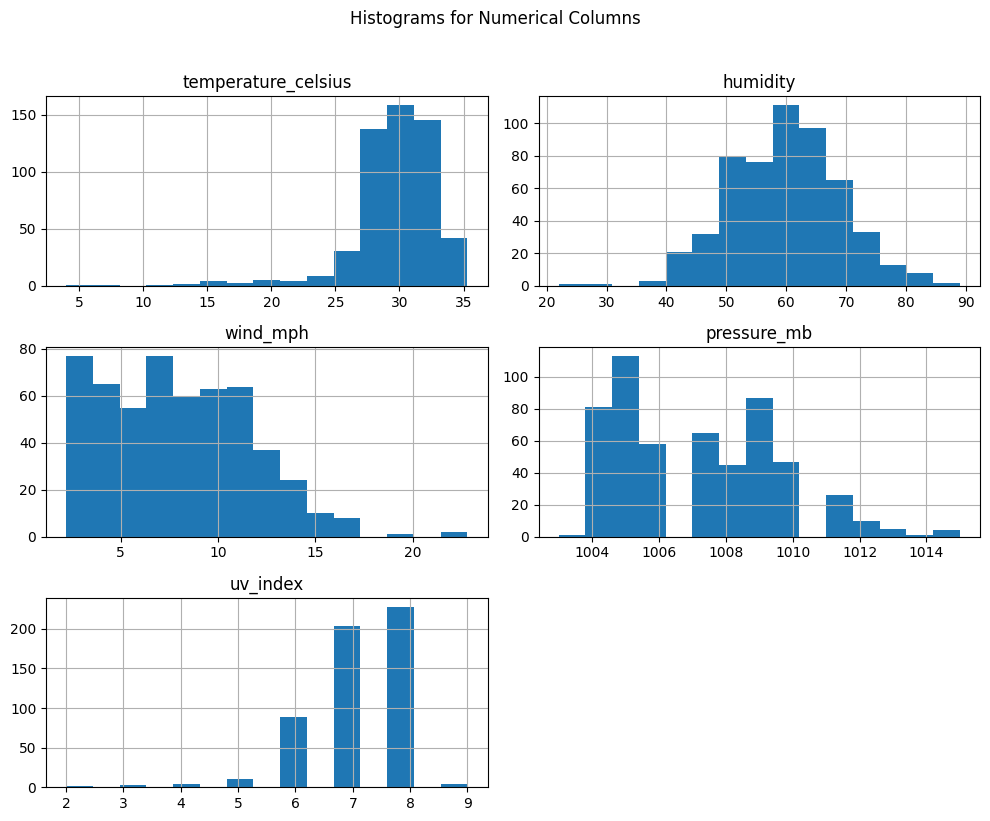

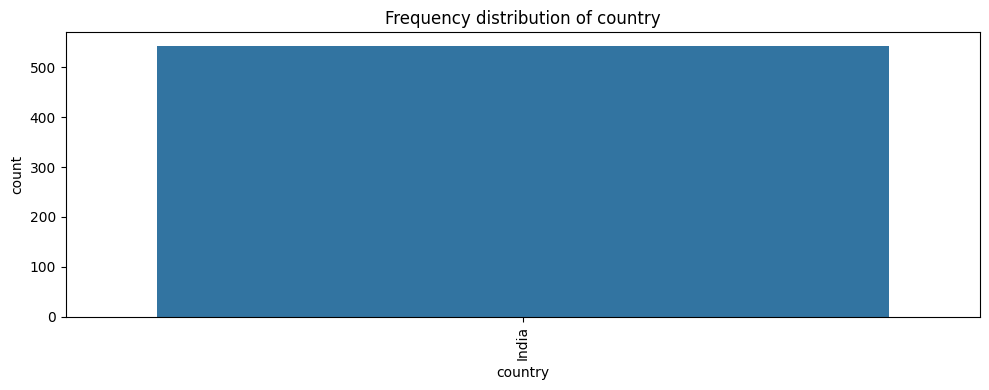

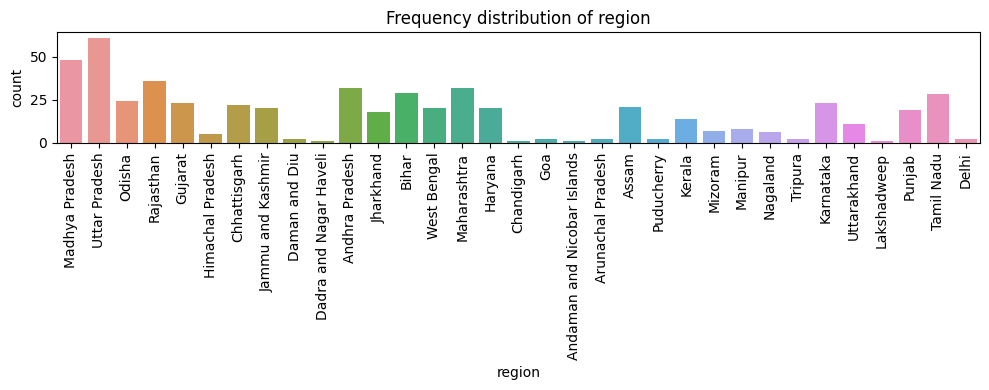

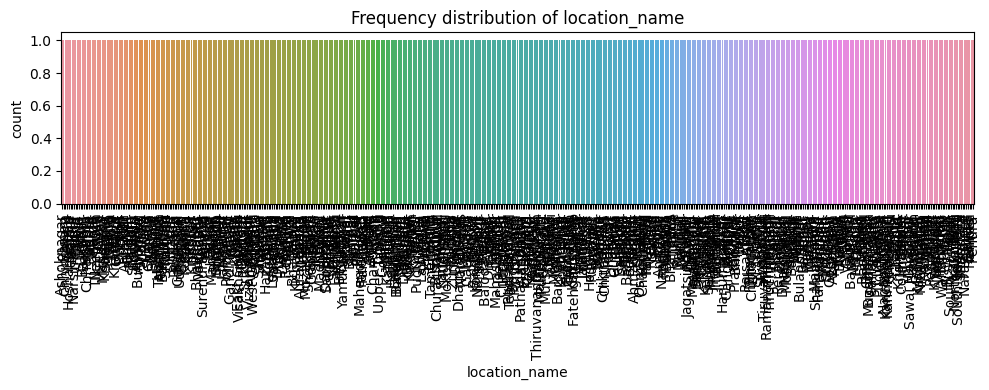

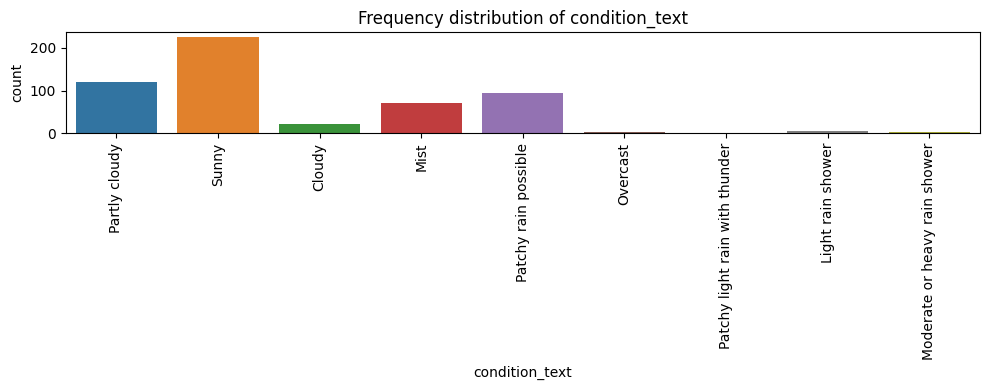

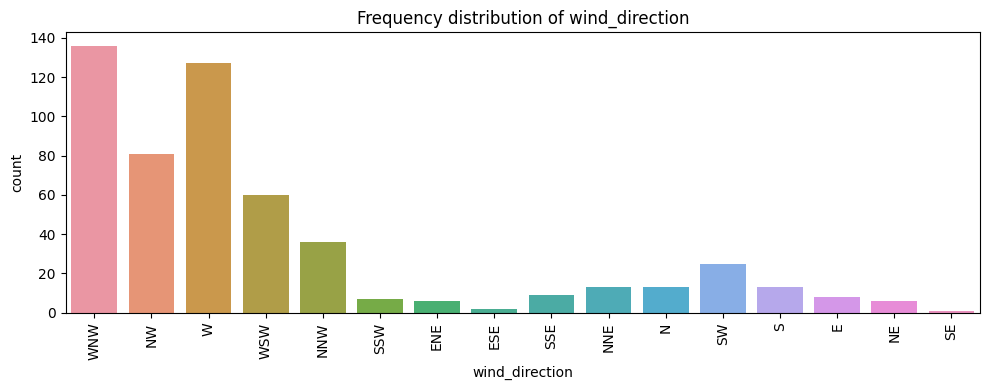

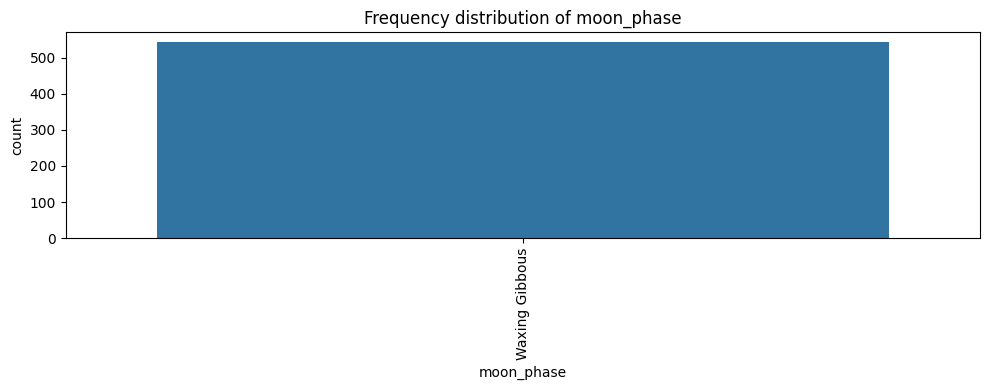

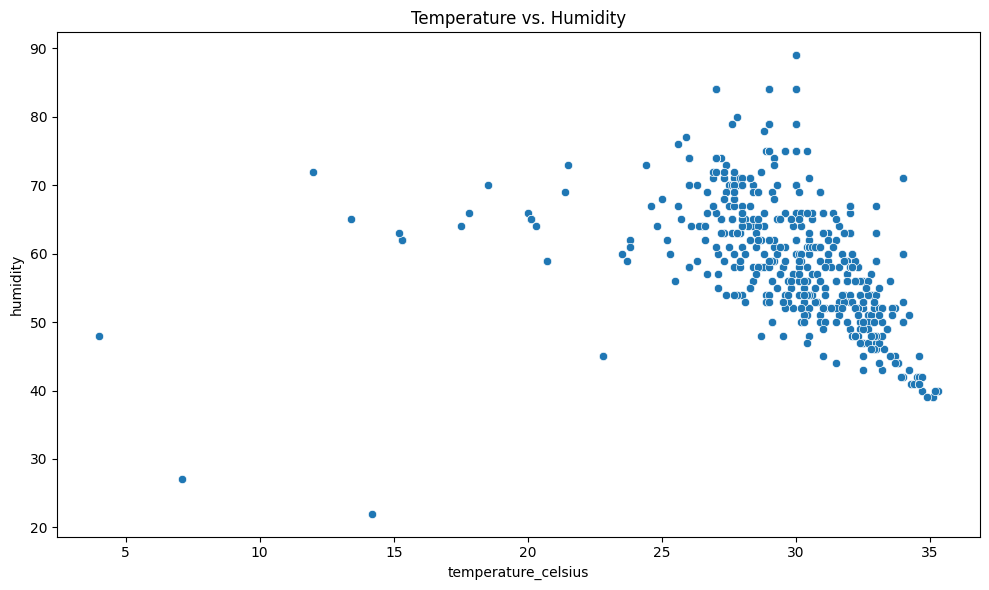

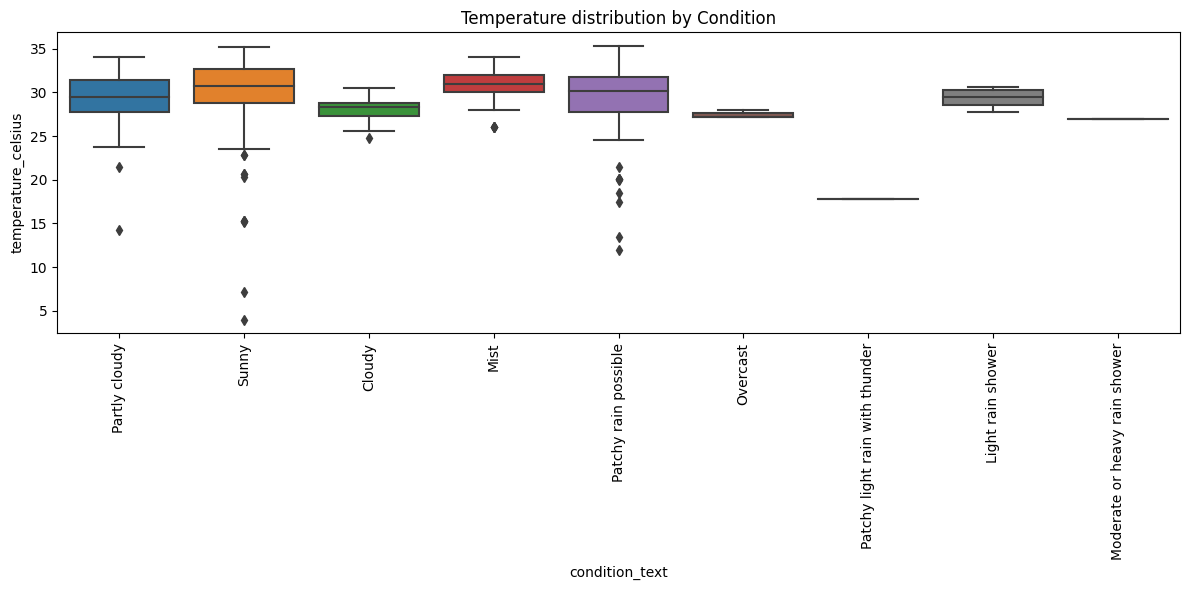

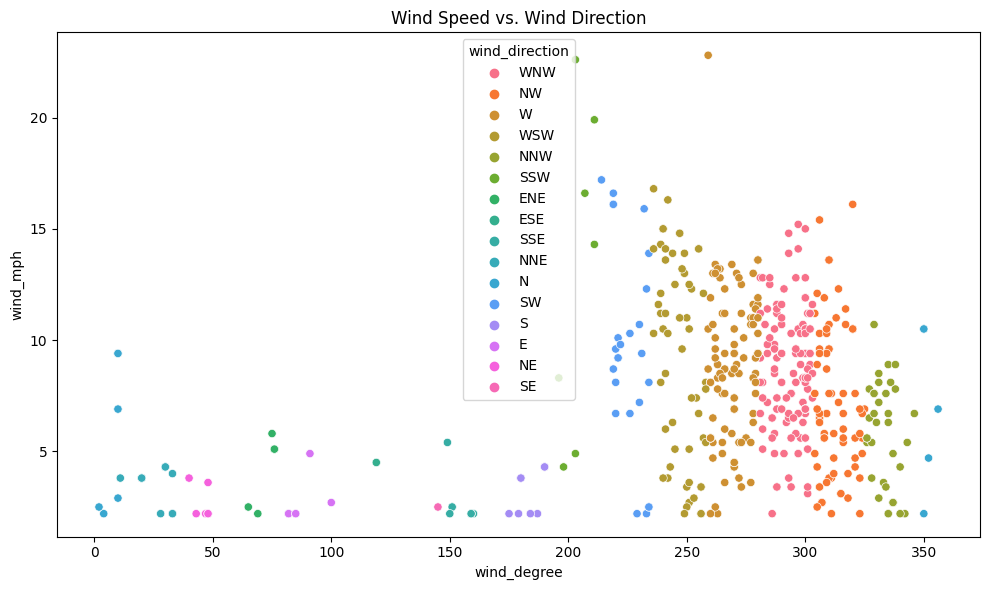

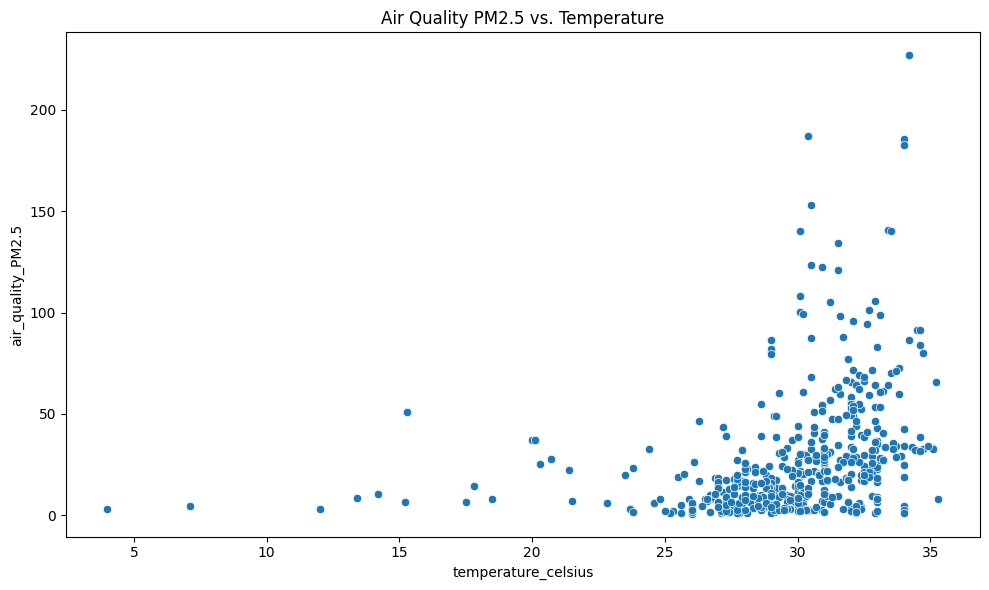

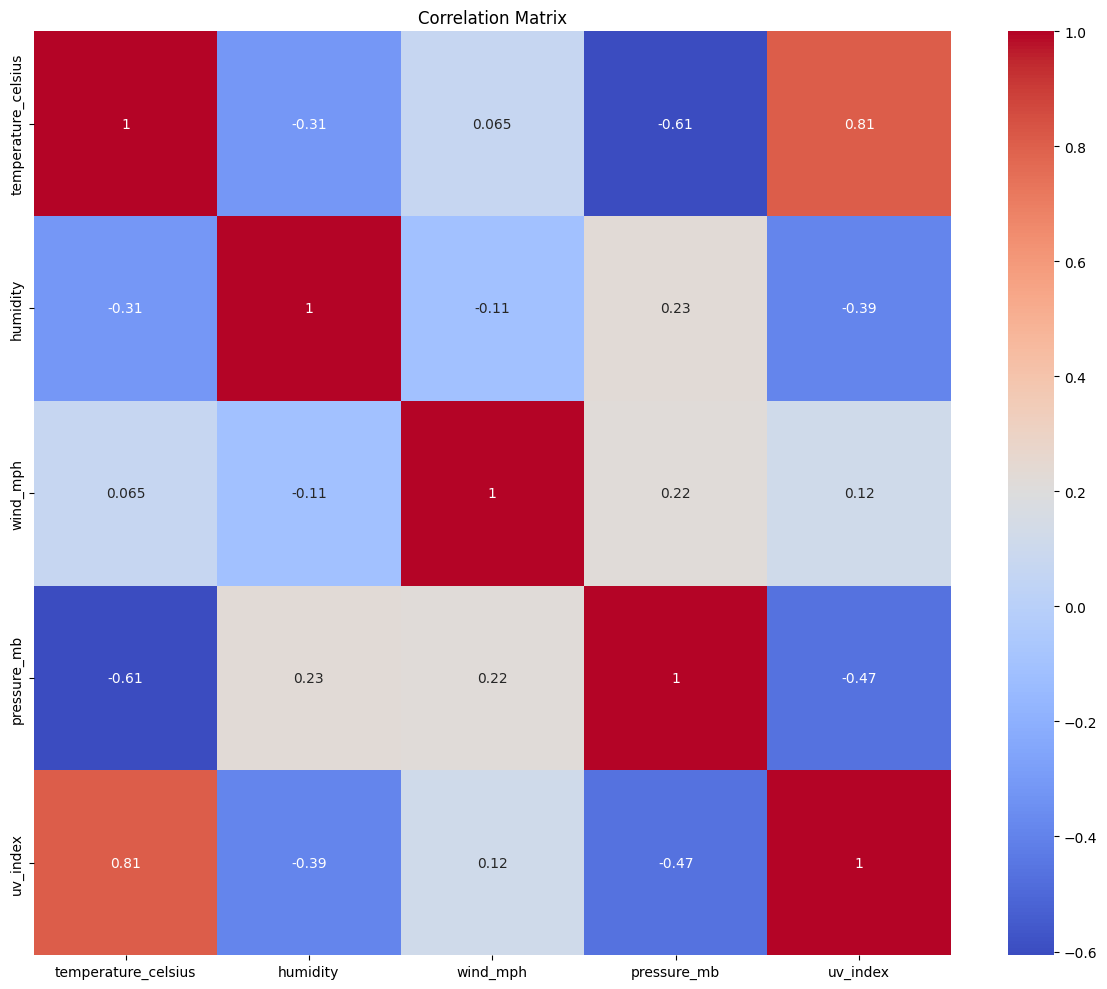

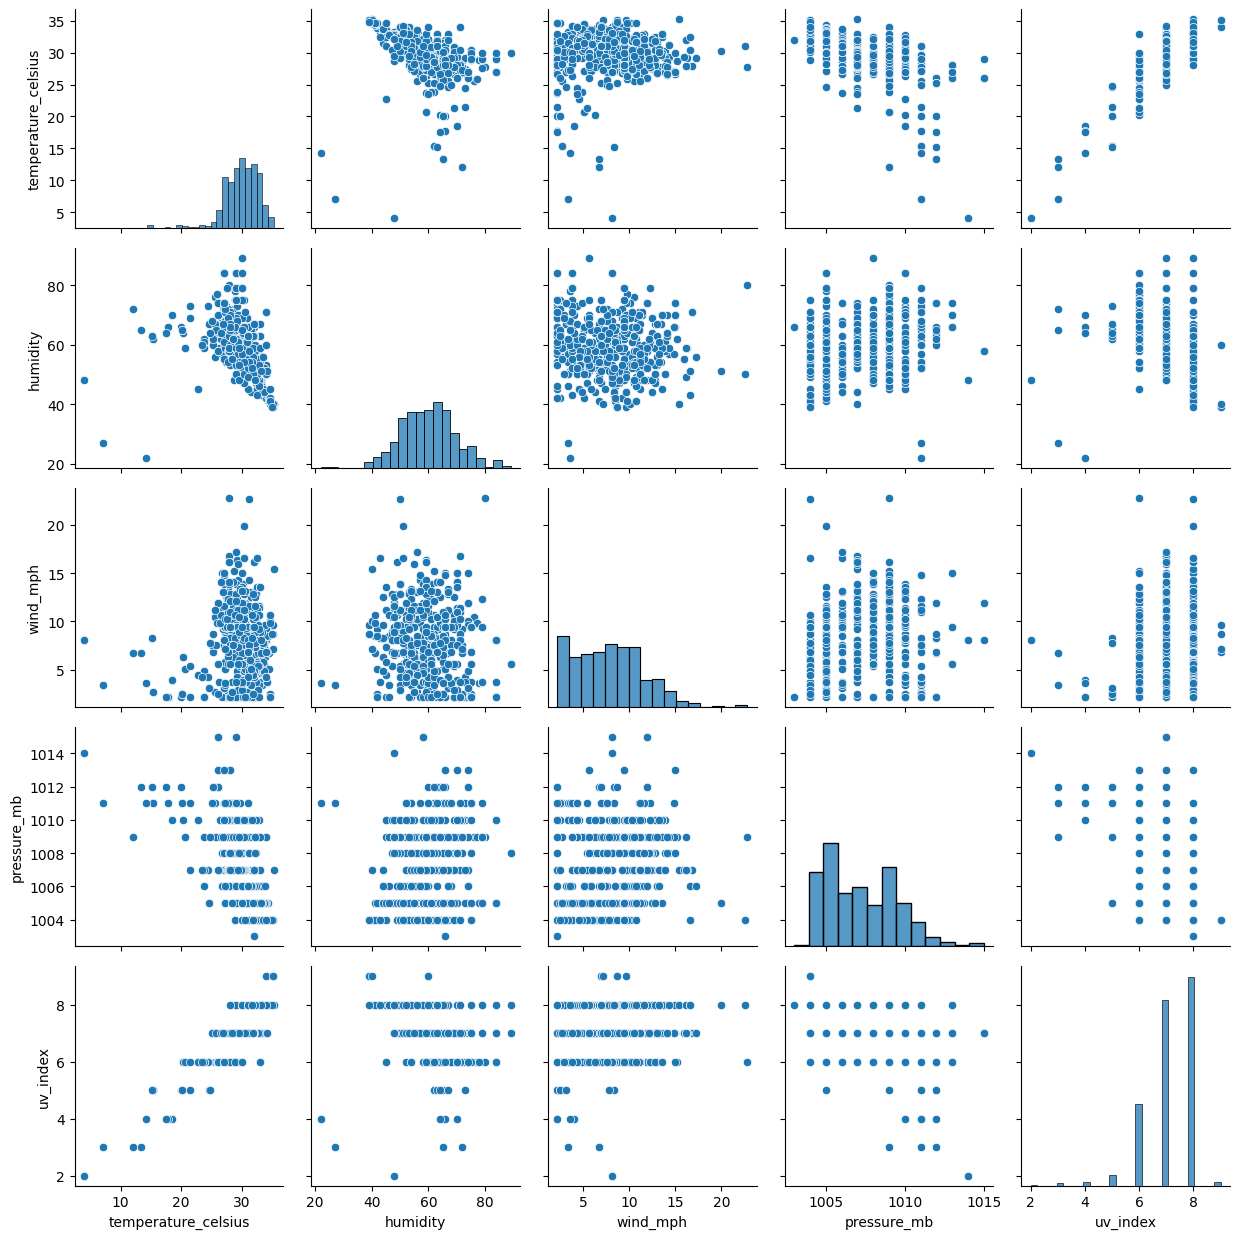

In [40]:
# Ensure numeric columns are in correct data types
weather_data['temperature_celsius'] = weather_data['temperature_celsius'].astype(float)
weather_data['humidity'] = weather_data['humidity'].astype(float)
weather_data['wind_mph'] = weather_data['wind_mph'].astype(float)
weather_data['pressure_mb'] = weather_data['pressure_mb'].astype(float)
weather_data['uv_index'] = weather_data['uv_index'].astype(float)
weather_data['wind_degree'] = weather_data['wind_degree'].astype(float)
weather_data['air_quality_PM2.5'] = weather_data['air_quality_PM2.5'].astype(float)

# Histograms for numerical columns
numerical_cols = ['temperature_celsius', 'humidity', 'wind_mph', 'pressure_mb', 'uv_index']
weather_data[numerical_cols].hist(figsize=(10, 8), bins=15)
plt.suptitle('Histograms for Numerical Columns', y=1.02)
plt.tight_layout()
plt.show()

# Frequency Distribution for Categorical Columns
categorical_cols = ['country', 'region', 'location_name', 'condition_text', 'wind_direction', 'moon_phase']
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=weather_data, x=col)
    plt.title(f'Frequency distribution of {col}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Temperature vs. Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_data, x='temperature_celsius', y='humidity')
plt.title('Temperature vs. Humidity')
plt.tight_layout()
plt.show()

# Boxplot of Temperature for Different Conditions
plt.figure(figsize=(12, 6))
sns.boxplot(data=weather_data, x='condition_text', y='temperature_celsius')
plt.title('Temperature distribution by Condition')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Wind Speed vs. Wind Direction
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_data, x='wind_degree', y='wind_mph', hue='wind_direction')
plt.title('Wind Speed vs. Wind Direction')
plt.tight_layout()
plt.show()

# Air Quality vs. Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_data, x='temperature_celsius', y='air_quality_PM2.5')
plt.title('Air Quality PM2.5 vs. Temperature')
plt.tight_layout()
plt.show()

# Correlation Heatmap for numeric columns only
plt.figure(figsize=(12, 10))
corr_matrix = weather_data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Pairwise Scatter Plot Matrix
sns.pairplot(weather_data[numerical_cols])
plt.tight_layout()
plt.show()


# **Calculate and Print the Difference**

In [41]:
# Check if the 'feels_like_celsius', 'wind_mph', 'sunset', 'sunrise', and 'air_quality_PM2.5' columns exist
required_columns = ['feels_like_celsius', 'temperature_celsius', 'wind_mph', 'sunset', 'sunrise', 'air_quality_PM2.5']
if all(col in weather_data.columns for col in required_columns):
    # Calculate the temperature difference (feels like - actual temperature)
    weather_data['temp_diff'] = weather_data['feels_like_celsius'] - weather_data['temperature_celsius']
    print("Temperature difference calculated successfully.")
    
    # Calculate the wind speed difference
    weather_data['wind_diff'] = weather_data['wind_mph'].diff()
    print("Wind speed difference calculated successfully.")
    
    # Calculate the sunset and sunrise duration difference (in hours)
    weather_data['daylight_duration_diff'] = (weather_data['sunset'] - weather_data['sunrise']).dt.total_seconds() / 3600
    print("Daylight duration difference calculated successfully.")
    
    # Calculate the air quality difference (PM2.5 difference)
    weather_data['air_quality_diff'] = weather_data['air_quality_PM2.5'].diff()
    print("Air quality difference calculated successfully.")
    
else:
    print("One or more required columns do not exist in the DataFrame.")

# Print the updated DataFrame
print(weather_data)


Temperature difference calculated successfully.
Wind speed difference calculated successfully.
Daylight duration difference calculated successfully.
Air quality difference calculated successfully.
    country location_name          region  latitude  longitude      timezone  \
0     India    Ashoknagar  Madhya Pradesh     24.57      77.72  Asia/Kolkata   
1     India        Raisen  Madhya Pradesh     23.33      77.80  Asia/Kolkata   
2     India    Chhindwara  Madhya Pradesh     22.07      78.93  Asia/Kolkata   
3     India         Betul  Madhya Pradesh     21.86      77.93  Asia/Kolkata   
4     India   Hoshangabad  Madhya Pradesh     22.75      77.72  Asia/Kolkata   
..      ...           ...             ...       ...        ...           ...   
566   India        Niwari   Uttar Pradesh     28.88      77.53  Asia/Kolkata   
568   India       Saitual         Mizoram     23.97      92.58  Asia/Kolkata   
569   India       Ranipet      Tamil Nadu     12.93      79.33  Asia/Kolkata   
570

# **Splitting Data into Training and Testing Sets**

In [9]:
from sklearn.model_selection import train_test_split

# Splitting the data
X = weather_data.drop(columns=['temperature_celsius', 'wind_kph', 'air_quality_us-epa-index', 'sunrise', 'moon_phase'])  # Feature set
y = weather_data[['temperature_celsius', 'wind_kph', 'air_quality_us-epa-index', 'sunrise', 'moon_phase']]  # Target variable

# Split the data into training and testing sets
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Data split successfully.")
except Exception as e:
    print(f"An error occurred while splitting the data: {e}")

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Data split successfully.
X_train shape: (434, 37)
X_test shape: (109, 37)
y_train shape: (434, 5)
y_test shape: (109, 5)


# **Data Preparation and Model Initialization and Evaluation**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load your dataset
weather_data = pd.read_csv('weather_data.csv')  # Assuming the data is in a CSV file

# Select features you want to use for prediction
features = ['temperature_celsius', 'wind_kph', 'air_quality_us-epa-index']

# Ensure all columns are numeric
weather_data = weather_data.apply(pd.to_numeric, errors='coerce')
weather_data = weather_data.dropna()

# Define target variables
y_temp = weather_data['temperature_celsius']
y_wind = weather_data['wind_kph']
y_air_quality = weather_data['air_quality_us-epa-index']

# Remove target variables from feature set
X = weather_data.drop(columns=['temperature_celsius', 'wind_kph', 'air_quality_us-epa-index'])

# Split the data into training and testing sets for each target variable
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y_temp, test_size=0.2, random_state=42)
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X, y_wind, test_size=0.2, random_state=42)
X_train_air, X_test_air, y_train_air, y_test_air = train_test_split(X, y_air_quality, test_size=0.2, random_state=42)

# Initialize models
linear_model_temp = LinearRegression()
forest_model_temp = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

linear_model_wind = LinearRegression()
forest_model_wind = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

linear_model_air = LinearRegression()
forest_model_air = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train and evaluate models for temperature
linear_model_temp.fit(X_train_temp, y_train_temp)
forest_model_temp.fit(X_train_temp, y_train_temp)

y_pred_temp_linear = linear_model_temp.predict(X_test_temp)
y_pred_temp_forest = forest_model_temp.predict(X_test_temp)

mse_temp_linear = mean_squared_error(y_test_temp, y_pred_temp_linear)
r2_temp_linear = r2_score(y_test_temp, y_pred_temp_linear)
mse_temp_forest = mean_squared_error(y_test_temp, y_pred_temp_forest)
r2_temp_forest = r2_score(y_test_temp, y_pred_temp_forest)

# Train and evaluate models for wind speed
linear_model_wind.fit(X_train_wind, y_train_wind)
forest_model_wind.fit(X_train_wind, y_train_wind)

y_pred_wind_linear = linear_model_wind.predict(X_test_wind)
y_pred_wind_forest = forest_model_wind.predict(X_test_wind)

mse_wind_linear = mean_squared_error(y_test_wind, y_pred_wind_linear)
r2_wind_linear = r2_score(y_test_wind, y_pred_wind_linear)
mse_wind_forest = mean_squared_error(y_test_wind, y_pred_wind_forest)
r2_wind_forest = r2_score(y_test_wind, y_pred_wind_forest)

# Train and evaluate models for air quality
linear_model_air.fit(X_train_air, y_train_air)
forest_model_air.fit(X_train_air, y_train_air)

y_pred_air_linear = linear_model_air.predict(X_test_air)
y_pred_air_forest = forest_model_air.predict(X_test_air)

mse_air_linear = mean_squared_error(y_test_air, y_pred_air_linear)
r2_air_linear = r2_score(y_test_air, y_pred_air_linear)
mse_air_forest = mean_squared_error(y_test_air, y_pred_air_forest)
r2_air_forest = r2_score(y_test_air, y_pred_air_forest)

# Save the best models
joblib.dump(forest_model_temp, 'temperature_forecast_model.pkl')
joblib.dump(forest_model_wind, 'wind_forecast_model.pkl')
joblib.dump(forest_model_air, 'air_quality_forecast_model.pkl')
print("Models saved as 'temperature_forecast_model.pkl', 'wind_forecast_model.pkl', and 'air_quality_forecast_model.pkl'")

# Display predictions in a table format
predictions_df = pd.DataFrame({
    'Actual temperature': y_test_temp,
    'Predicted temperature (Linear)': y_pred_temp_linear,
    'Predicted temperature (Forest)': y_pred_temp_forest,
    'Actual wind speed': y_test_wind,
    'Predicted wind speed (Linear)': y_pred_wind_linear,
    'Predicted wind speed (Forest)': y_pred_wind_forest,
    'Actual air quality': y_test_air,
    'Predicted air quality (Linear)': y_pred_air_linear,
    'Predicted air quality (Forest)': y_pred_air_forest
})

print("\nPredictions:")
print(predictions_df.head())

# Print evaluation metrics
print("\nEvaluation Metrics for Temperature Prediction:")
print(f"Linear Model - MSE: {mse_temp_linear:.2f}, R2 Score: {r2_temp_linear:.2f}")
print(f"Forest Model - MSE: {mse_temp_forest:.2f}, R2 Score: {r2_temp_forest:.2f}")

print("\nEvaluation Metrics for Wind Speed Prediction:")
print(f"Linear Model - MSE: {mse_wind_linear:.2f}, R2 Score: {r2_wind_linear:.2f}")
print(f"Forest Model - MSE: {mse_wind_forest:.2f}, R2 Score: {r2_wind_forest:.2f}")

print("\nEvaluation Metrics for Air Quality Prediction:")
print(f"Linear Model - MSE: {mse_air_linear:.2f}, R2 Score: {r2_air_linear:.2f}")
print(f"Forest Model - MSE: {mse_air_forest:.2f}, R2 Score: {r2_air_forest:.2f}")


# **Model Selection**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

# Select features you want to use for prediction
features = ['temperature_celsius', 'wind_kph', 'air_quality_us-epa-index']

# Ensure all columns are numeric
weather_data = weather_data.apply(pd.to_numeric, errors='coerce')
weather_data = weather_data.dropna()

# Define target variables
y_temp = weather_data['temperature_celsius']
y_wind = weather_data['wind_kph']
y_air_quality = weather_data['air_quality_us-epa-index']

# Remove target variables from feature set
X = weather_data.drop(columns=['temperature_celsius', 'wind_kph', 'air_quality_us-epa-index'])

# Split the data into training and testing sets for each target variable
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y_temp, test_size=0.2, random_state=42)
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X, y_wind, test_size=0.2, random_state=42)
X_train_air, X_test_air, y_train_air, y_test_air = train_test_split(X, y_air_quality, test_size=0.2, random_state=42)

# Define a function for model selection using GridSearchCV
def model_selection(X_train, y_train, X_test, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42)
    }

    params = {
        'Linear Regression': {
            'model__fit_intercept': [True, False],
            'model__normalize': [True, False]
        },
        'Random Forest': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20, 30]
        }
    }

    best_models = {}
    for name in models.keys():
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', models[name])
        ])
        grid = GridSearchCV(pipeline, params[name], cv=5, scoring='neg_mean_squared_error')
        grid.fit(X_train, y_train)
        best_models[name] = grid.best_estimator_
        print(f"Best {name} Model: {grid.best_params_}")

        y_pred = grid.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"{name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}\n")
    
    return best_models

# Model selection for temperature
print("Model Selection for Temperature:")
best_temp_models = model_selection(X_train_temp, y_train_temp, X_test_temp, y_test_temp)

# Model selection for wind speed
print("Model Selection for Wind Speed:")
best_wind_models = model_selection(X_train_wind, y_train_wind, X_test_wind, y_test_wind)

# Model selection for air quality
print("Model Selection for Air Quality:")
best_air_models = model_selection(X_train_air, y_train_air, X_test_air, y_test_air)

# Save the best models
joblib.dump(best_temp_models['Random Forest'], 'best_temperature_model.pkl')
joblib.dump(best_wind_models['Random Forest'], 'best_wind_model.pkl')
joblib.dump(best_air_models['Random Forest'], 'best_air_quality_model.pkl')
print("Best models saved as 'best_temperature_model.pkl', 'best_wind_model.pkl', and 'best_air_quality_model.pkl'")

# Display predictions in a table format
best_temp_model = best_temp_models['Random Forest']
best_wind_model = best_wind_models['Random Forest']
best_air_model = best_air_models['Random Forest']

predictions_df = pd.DataFrame({
    'Actual temperature': y_test_temp,
    'Predicted temperature': best_temp_model.predict(X_test_temp),
    'Actual wind speed': y_test_wind,
    'Predicted wind speed': best_wind_model.predict(X_test_wind),
    'Actual air quality': y_test_air,
    'Predicted air quality': best_air_model.predict(X_test_air)
})

print("\nPredictions:")
print(predictions_df.head())

# Print evaluation metrics
print("\nEvaluation Metrics for Temperature Prediction:")
y_pred_temp = best_temp_model.predict(X_test_temp)
print(f"Best Model - MSE: {mean_squared_error(y_test_temp, y_pred_temp):.2f}, R2 Score: {r2_score(y_test_temp, y_pred_temp):.2f}")

print("\nEvaluation Metrics for Wind Speed Prediction:")
y_pred_wind = best_wind_model.predict(X_test_wind)
print(f"Best Model - MSE: {mean_squared_error(y_test_wind, y_pred_wind):.2f}, R2 Score: {r2_score(y_test_wind, y_pred_wind):.2f}")

print("\nEvaluation Metrics for Air Quality Prediction:")
y_pred_air = best_air_model.predict(X_test_air)
print(f"Best Model - MSE: {mean_squared_error(y_test_air, y_pred_air):.2f}, R2 Score: {r2_score(y_test_air, y_pred_air):.2f}")


#  **Rrained Random Forest models to predict future values for temperature, humidity, precipitation, wind speed, and pressure**

In [ ]:
# Ensure all columns are numeric
weather_data = weather_data.apply(pd.to_numeric, errors='coerce')
weather_data = weather_data.dropna()

# Select features you want to use for prediction
features = ['temperature_celsius', 'humidity', 'precipitation_mm', 'wind_kph', 'pressure_mb']

# Define target variables
y_temp = weather_data['temperature_celsius']
y_humidity = weather_data['humidity']
y_precipitation = weather_data['precipitation_mm']
y_wind = weather_data['wind_kph']
y_pressure = weather_data['pressure_mb']

# Remove target variables from feature set
X = weather_data.drop(columns=['temperature_celsius', 'humidity', 'precipitation_mm', 'wind_kph', 'pressure_mb'])

# Split the data into training and testing sets for each target variable
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y_temp, test_size=0.2, random_state=42)
X_train_humidity, X_test_humidity, y_train_humidity, y_test_humidity = train_test_split(X, y_humidity, test_size=0.2, random_state=42)
X_train_precipitation, X_test_precipitation, y_train_precipitation, y_test_precipitation = train_test_split(X, y_precipitation, test_size=0.2, random_state=42)
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X, y_wind, test_size=0.2, random_state=42)
X_train_pressure, X_test_pressure, y_train_pressure, y_test_pressure = train_test_split(X, y_pressure, test_size=0.2, random_state=42)

# Initialize Random Forest models
forest_model_temp = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
forest_model_humidity = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
forest_model_precipitation = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
forest_model_wind = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
forest_model_pressure = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train and evaluate models for temperature
forest_model_temp.fit(X_train_temp, y_train_temp)
y_pred_temp_forest = forest_model_temp.predict(X_test_temp)
mse_temp_forest = mean_squared_error(y_test_temp, y_pred_temp_forest)
r2_temp_forest = r2_score(y_test_temp, y_pred_temp_forest)
print(f"Temperature - MSE: {mse_temp_forest:.2f}, R2 Score: {r2_temp_forest:.2f}")

# Train and evaluate models for humidity
forest_model_humidity.fit(X_train_humidity, y_train_humidity)
y_pred_humidity_forest = forest_model_humidity.predict(X_test_humidity)
mse_humidity_forest = mean_squared_error(y_test_humidity, y_pred_humidity_forest)
r2_humidity_forest = r2_score(y_test_humidity, y_pred_humidity_forest)
print(f"Humidity - MSE: {mse_humidity_forest:.2f}, R2 Score: {r2_humidity_forest:.2f}")

# Train and evaluate models for precipitation
forest_model_precipitation.fit(X_train_precipitation, y_train_precipitation)
y_pred_precipitation_forest = forest_model_precipitation.predict(X_test_precipitation)
mse_precipitation_forest = mean_squared_error(y_test_precipitation, y_pred_precipitation_forest)
r2_precipitation_forest = r2_score(y_test_precipitation, y_pred_precipitation_forest)
print(f"Precipitation - MSE: {mse_precipitation_forest:.2f}, R2 Score: {r2_precipitation_forest:.2f}")

# Train and evaluate models for wind speed
forest_model_wind.fit(X_train_wind, y_train_wind)
y_pred_wind_forest = forest_model_wind.predict(X_test_wind)
mse_wind_forest = mean_squared_error(y_test_wind, y_pred_wind_forest)
r2_wind_forest = r2_score(y_test_wind, y_pred_wind_forest)
print(f"Wind Speed - MSE: {mse_wind_forest:.2f}, R2 Score: {r2_wind_forest:.2f}")

# Train and evaluate models for pressure
forest_model_pressure.fit(X_train_pressure, y_train_pressure)
y_pred_pressure_forest = forest_model_pressure.predict(X_test_pressure)
mse_pressure_forest = mean_squared_error(y_test_pressure, y_pred_pressure_forest)
r2_pressure_forest = r2_score(y_test_pressure, y_pred_pressure_forest)
print(f"Pressure - MSE: {mse_pressure_forest:.2f}, R2 Score: {r2_pressure_forest:.2f}")

# Save the trained models
joblib.dump(forest_model_temp, 'temperature_model.pkl')
joblib.dump(forest_model_humidity, 'humidity_model.pkl')
joblib.dump(forest_model_precipitation, 'precipitation_model.pkl')
joblib.dump(forest_model_wind, 'wind_model.pkl')
joblib.dump(forest_model_pressure, 'pressure_model.pkl')
print("Models saved as 'temperature_model.pkl', 'humidity_model.pkl', 'precipitation_model.pkl', 'wind_model.pkl', and 'pressure_model.pkl'")

# Display predictions in a table format
predictions_df = pd.DataFrame({
    'Actual temperature': y_test_temp,
    'Predicted temperature': y_pred_temp_forest,
    'Actual humidity': y_test_humidity,
    'Predicted humidity': y_pred_humidity_forest,
    'Actual precipitation': y_test_precipitation,
    'Predicted precipitation': y_pred_precipitation_forest,
    'Actual wind speed': y_test_wind,
    'Predicted wind speed': y_pred_wind_forest,
    'Actual pressure': y_test_pressure,
    'Predicted pressure': y_pred_pressure_forest
})

print("\nPredictions:")
print(predictions_df.head())


# **Conclusion**
1. **Data Cleaning and Preprocessing:**
* The dataset underwent thorough cleaning to handle missing values, outliers, and inconsistencies.
* Preprocessing steps included converting data types, handling categorical variables, and scaling numerical features.
* Quality assurance measures were implemented to ensure data integrity and consistency.

**2. Feature Engineering**
* Feature engineering played a crucial role in enhancing model performance by extracting meaningful information from raw data.
* Techniques such as one-hot encoding, feature scaling, and creating new features improved the model's ability to capture relevant patterns.
* Domain knowledge and exploratory data analysis guided feature selection and transformation processes.

3. **Model Training and Evaluation**
* Various machine learning algorithms, including linear regression, random forest, and XGBoost, were trained and evaluated.
* Evaluation metrics such as mean squared error (MSE), R-squared (R2), and visualizations aided in assessing model performance.
* Iterative experimentation and hyperparameter tuning were conducted to optimize model performance and generalization ability.
* Model interpretability and robustness were key considerations in selecting the final predictive model.

**4. Visualization and Analysis**
* Visualizations provided insights into data distributions, relationships between variables, and model predictions.
* Exploratory analysis facilitated understanding of underlying patterns, trends, and correlations within the dataset.
* Interactive visualizations and dashboards enhanced communication of findings and facilitated stakeholder engagement.
* Continuous monitoring and refinement of models and visualizations are essential for adapting to evolving data and business requirements.
